# Module: Data Science for Asset Management {-}

# Session 4: Quantitative Portfolio Construction {-}

# Install and Import Libraries

In [1]:
#Import libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
#sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10

RANDOM_SEED=2 # I'm seeding with 2, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

In [2]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf

# Download and Collect Asset Data

In [14]:
# ## More efficient way of downloading a large number of stocks
# tickers = ['CSPX.L', 'EDMU.DE', 'IJS', "IMEU.AS", "IJPN.AS", "EIMU.L", "BLKC.AS", "IDTL.L", 
#            "ITPS.MI", "LQDE.MI", "SHYU.L", "AGGG.L", "IWDP.L", "ICOM.L", "INFR.AS"]
# n_assets = len(tickers)

# stocks = pd.DataFrame()
# date_start = datetime(2024, 1, 1)
# date_end = datetime(2025, 1, 1)

# for stock_name in tickers:
#     # daily data (Close Price)
#     data = yf.download(stock_name, start=date_start, end=date_end, group_by="ticker")
#     stocks[stock_name] = data[stock_name].Close

# stocks = stocks.dropna()

# # Change the column names
# stocks.columns =  ['CSPX', 'EDMU', 'ISP6', 'IMEU', 'IJPN','EIMU', 'BLKC', 'IDTL',
#                    'ITPS', 'LQDE', 'SHYU', 'AGGG', 'IWDP', 'ICOM', 'INFR']
# stocks

# #stocks.to_csv('stocks_1.csv', index=False) 
# #stocks.to_csv('stocks_2.csv', index=True) 

In [5]:
date_start = "2024-01-01"
date_end = "2025-01-01"

# 16 assets
CSPX = yf.download("CSPX.L",  start=date_start, end=date_end, group_by="ticker") 
EDMU = yf.download("EDMU.DE", start=date_start, end=date_end, group_by="ticker") 
ISP6 = yf.download("IJS",     start=date_start, end=date_end, group_by="ticker") 
IMEU = yf.download("IMEU.AS", start=date_start, end=date_end, group_by="ticker") 
IJPN = yf.download("IJPN.AS", start=date_start, end=date_end, group_by="ticker") 
EIMU = yf.download("EIMU.L",  start=date_start, end=date_end, group_by="ticker") 
#DFND = yf.download("DFND", start=date_start, end=date_end, group_by="ticker")  #this asset has less historical data, so we ignore it now
BLKC = yf.download("BLKC.AS", start=date_start, end=date_end, group_by="ticker") 
IDTL = yf.download("IDTL.L",  start=date_start, end=date_end, group_by="ticker") 
ITPS = yf.download("ITPS.MI", start=date_start, end=date_end, group_by="ticker") 
LQDE = yf.download("LQDE.MI", start=date_start, end=date_end, group_by="ticker") 
SHYU = yf.download("SHYU.L",  start=date_start, end=date_end, group_by="ticker") 
AGGG = yf.download("AGGG.L",  start=date_start, end=date_end, group_by="ticker") 
IWDP = yf.download("IWDP.L",  start=date_start, end=date_end, group_by="ticker") 
ICOM = yf.download("ICOM.L",  start=date_start, end=date_end, group_by="ticker") 
INFR = yf.download("INFR.AS", start=date_start, end=date_end, group_by="ticker") 
print(CSPX.shape, EDMU.shape, ISP6.shape, IMEU.shape, IJPN.shape, EIMU.shape, #DFND.shape, 
      BLKC.shape, IDTL.shape, ITPS.shape, LQDE.shape, SHYU.shape, AGGG.shape, IWDP.shape, ICOM.shape, INFR.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

(254, 5) (254, 5) (252, 5) (256, 5) (256, 5) (254, 5) (256, 5) (254, 5) (253, 5) (253, 5) (254, 5) (254, 5) (254, 5) (254, 5) (256, 5)


In [6]:
CSPX

Ticker          CSPX.L                                            
Price             Open        High         Low       Close  Volume
Date                                                              
2024-01-02  501.339996  501.820007  496.250000  497.589996   45558
2024-01-03  497.589996  497.799988  493.531891  494.649994   80014
2024-01-04  494.380005  495.879791  492.730011  495.299988   52474
2024-01-05  491.549988  495.230011  489.179993  494.100006   58499
2024-01-08  492.200012  533.619995  490.769989  495.299988   63324
...                ...         ...         ...         ...     ...
2024-12-23  632.080017  669.099976  625.989990  629.239990   75537
2024-12-24  633.989990  642.532227  631.780029  634.460022   25520
2024-12-27  638.729980  672.520020  630.599976  632.849976  158165
2024-12-30  631.429993  670.820007  622.500000  626.750000  348621
2024-12-31  626.450012  629.320007  625.799988  628.780029   33720

[254 rows x 5 columns]

In [7]:
ISP6

Ticker             IJS                                             
Price             Open        High         Low       Close   Volume
Date                                                               
2024-01-02   99.083916  100.761007   98.754318   99.636482  1118700
2024-01-03   98.482881   98.482881   96.359867   96.524666   803200
2024-01-04   96.476187   97.057842   96.292003   96.340469   887300
2024-01-05   95.807303   97.532861   95.574638   96.447113   392300
2024-01-08   96.233838   97.930314   95.846077   97.833374   338300
...                ...         ...         ...         ...      ...
2024-12-24  107.371742  108.161679  106.799046  108.013565    95000
2024-12-26  107.430992  108.961484  107.036023  108.813370   147000
2024-12-27  108.230805  108.912125  106.720058  107.509987   240200
2024-12-30  106.710166  107.282870  105.604256  106.828659   284800
2024-12-31  107.322365  108.319651  106.917521  107.243370   213100

[252 rows x 5 columns]

In [8]:
BLKC

Ticker      BLKC.AS                                  
Price          Open     High      Low    Close Volume
Date                                                 
2024-01-02  10.4860  11.3875  10.3061  10.2613   2033
2024-01-03  10.0420  10.1022   9.2449   9.8962  10628
2024-01-04   9.7906  10.1500   9.6494  10.1267   4191
2024-01-05  10.2047  10.2047   9.7300   9.6393   2942
2024-01-08   9.7165   9.9308   9.5659   9.7758  19137
...             ...      ...      ...      ...    ...
2024-12-23  13.2836  13.3747  12.7435  12.7613  14162
2024-12-24  13.0019  13.0019  12.8416  12.8613   2285
2024-12-27  13.4261  13.4261  12.6829  12.8085  24016
2024-12-30  12.7501  12.7501  12.0000  12.2018   5951
2024-12-31  12.2405  12.5371  12.2405  12.4815   3942

[256 rows x 5 columns]

In [9]:
ISP6.isnull().sum()

Ticker  Price 
IJS     Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [15]:
#Combining dataframes
dataset = pd.concat([CSPX['CSPX.L'].Close, 
                     EDMU['EDMU.DE'].Close, 
                     ISP6['IJS'].Close, 
                     IMEU['IMEU.AS'].Close, 
                     IJPN['IJPN.AS'].Close, 
                     EIMU['EIMU.L'].Close, 
                     #DFND['NA'].Close, 
                     BLKC['BLKC.AS'].Close, 
                     IDTL['IDTL.L'].Close, 
                     ITPS['ITPS.MI'].Close, 
                     LQDE['LQDE.MI'].Close, 
                     SHYU['SHYU.L'].Close, 
                     AGGG['AGGG.L'].Close, 
                     IWDP['IWDP.L'].Close, 
                     ICOM['ICOM.L'].Close, 
                     INFR['INFR.AS'].Close],axis=1)
# Change the column names
dataset.columns =  ['CSPX', 'EDMU', 'ISP6', 'IMEU', 'IJPN', 'EIMU', 'BLKC', 'IDTL',
                   'ITPS', 'LQDE', 'SHYU', 'AGGG', 'IWDP', 'ICOM', 'INFR']
dataset

# Question: why do some stocks have empty cells in the table?
#dataset.to_csv('dataset_1.csv', index=False) 
#dataset.to_csv('dataset_2.csv', index=True) 

In [16]:
dataset.shape

(259, 15)

In [17]:
dataset.isnull().sum() # Question: why do some stocks have empty cells in the table?

CSPX    5
EDMU    5
ISP6    7
IMEU    3
IJPN    3
EIMU    5
BLKC    3
IDTL    5
ITPS    6
LQDE    6
SHYU    5
AGGG    5
IWDP    5
ICOM    5
INFR    3
dtype: int64

In [18]:
dataset = dataset.dropna()

In [19]:
print('Shape of data',dataset.shape)

Shape of data (244, 15)


# Exploratory Data Analysis (EDA) for Assets

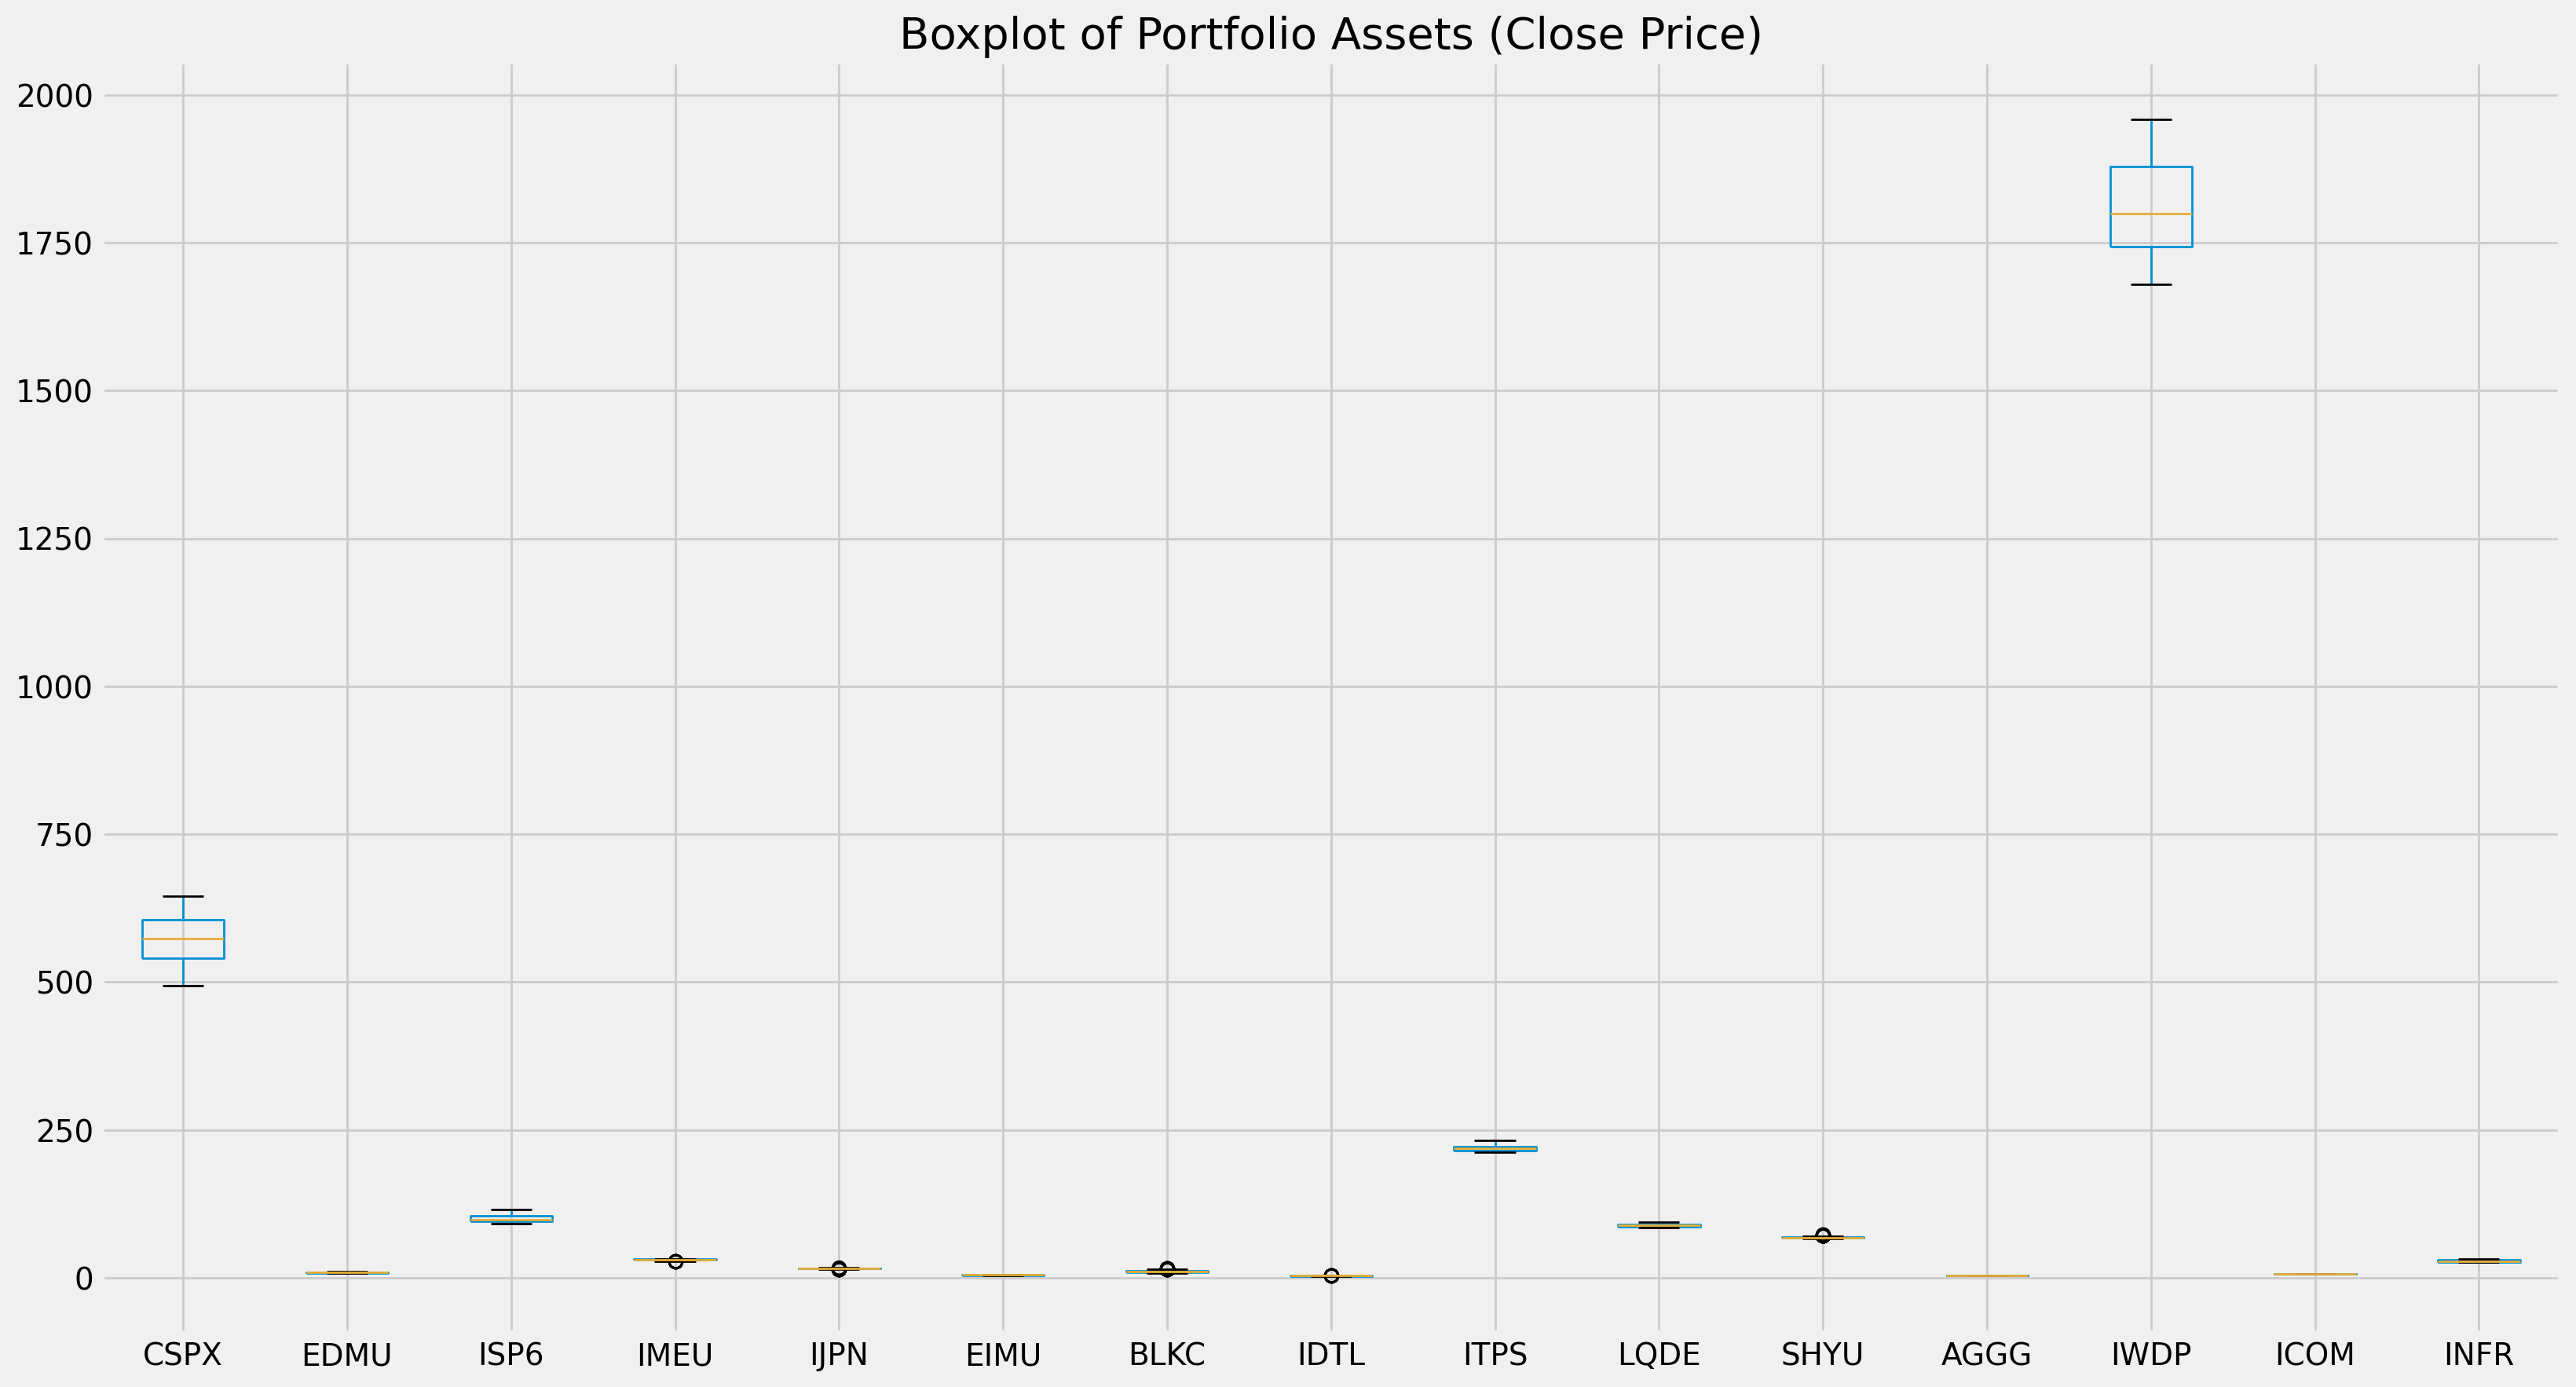

In [24]:
plt.style.use("fivethirtyeight")
#dataset[dataset.columns].boxplot() 
#dataset[['CSPX', 'EDMU']].boxplot() #if you want to plot specific columns
dataset.boxplot()
plt.title("Boxplot of Portfolio Assets (Close Price)")
plt.show()

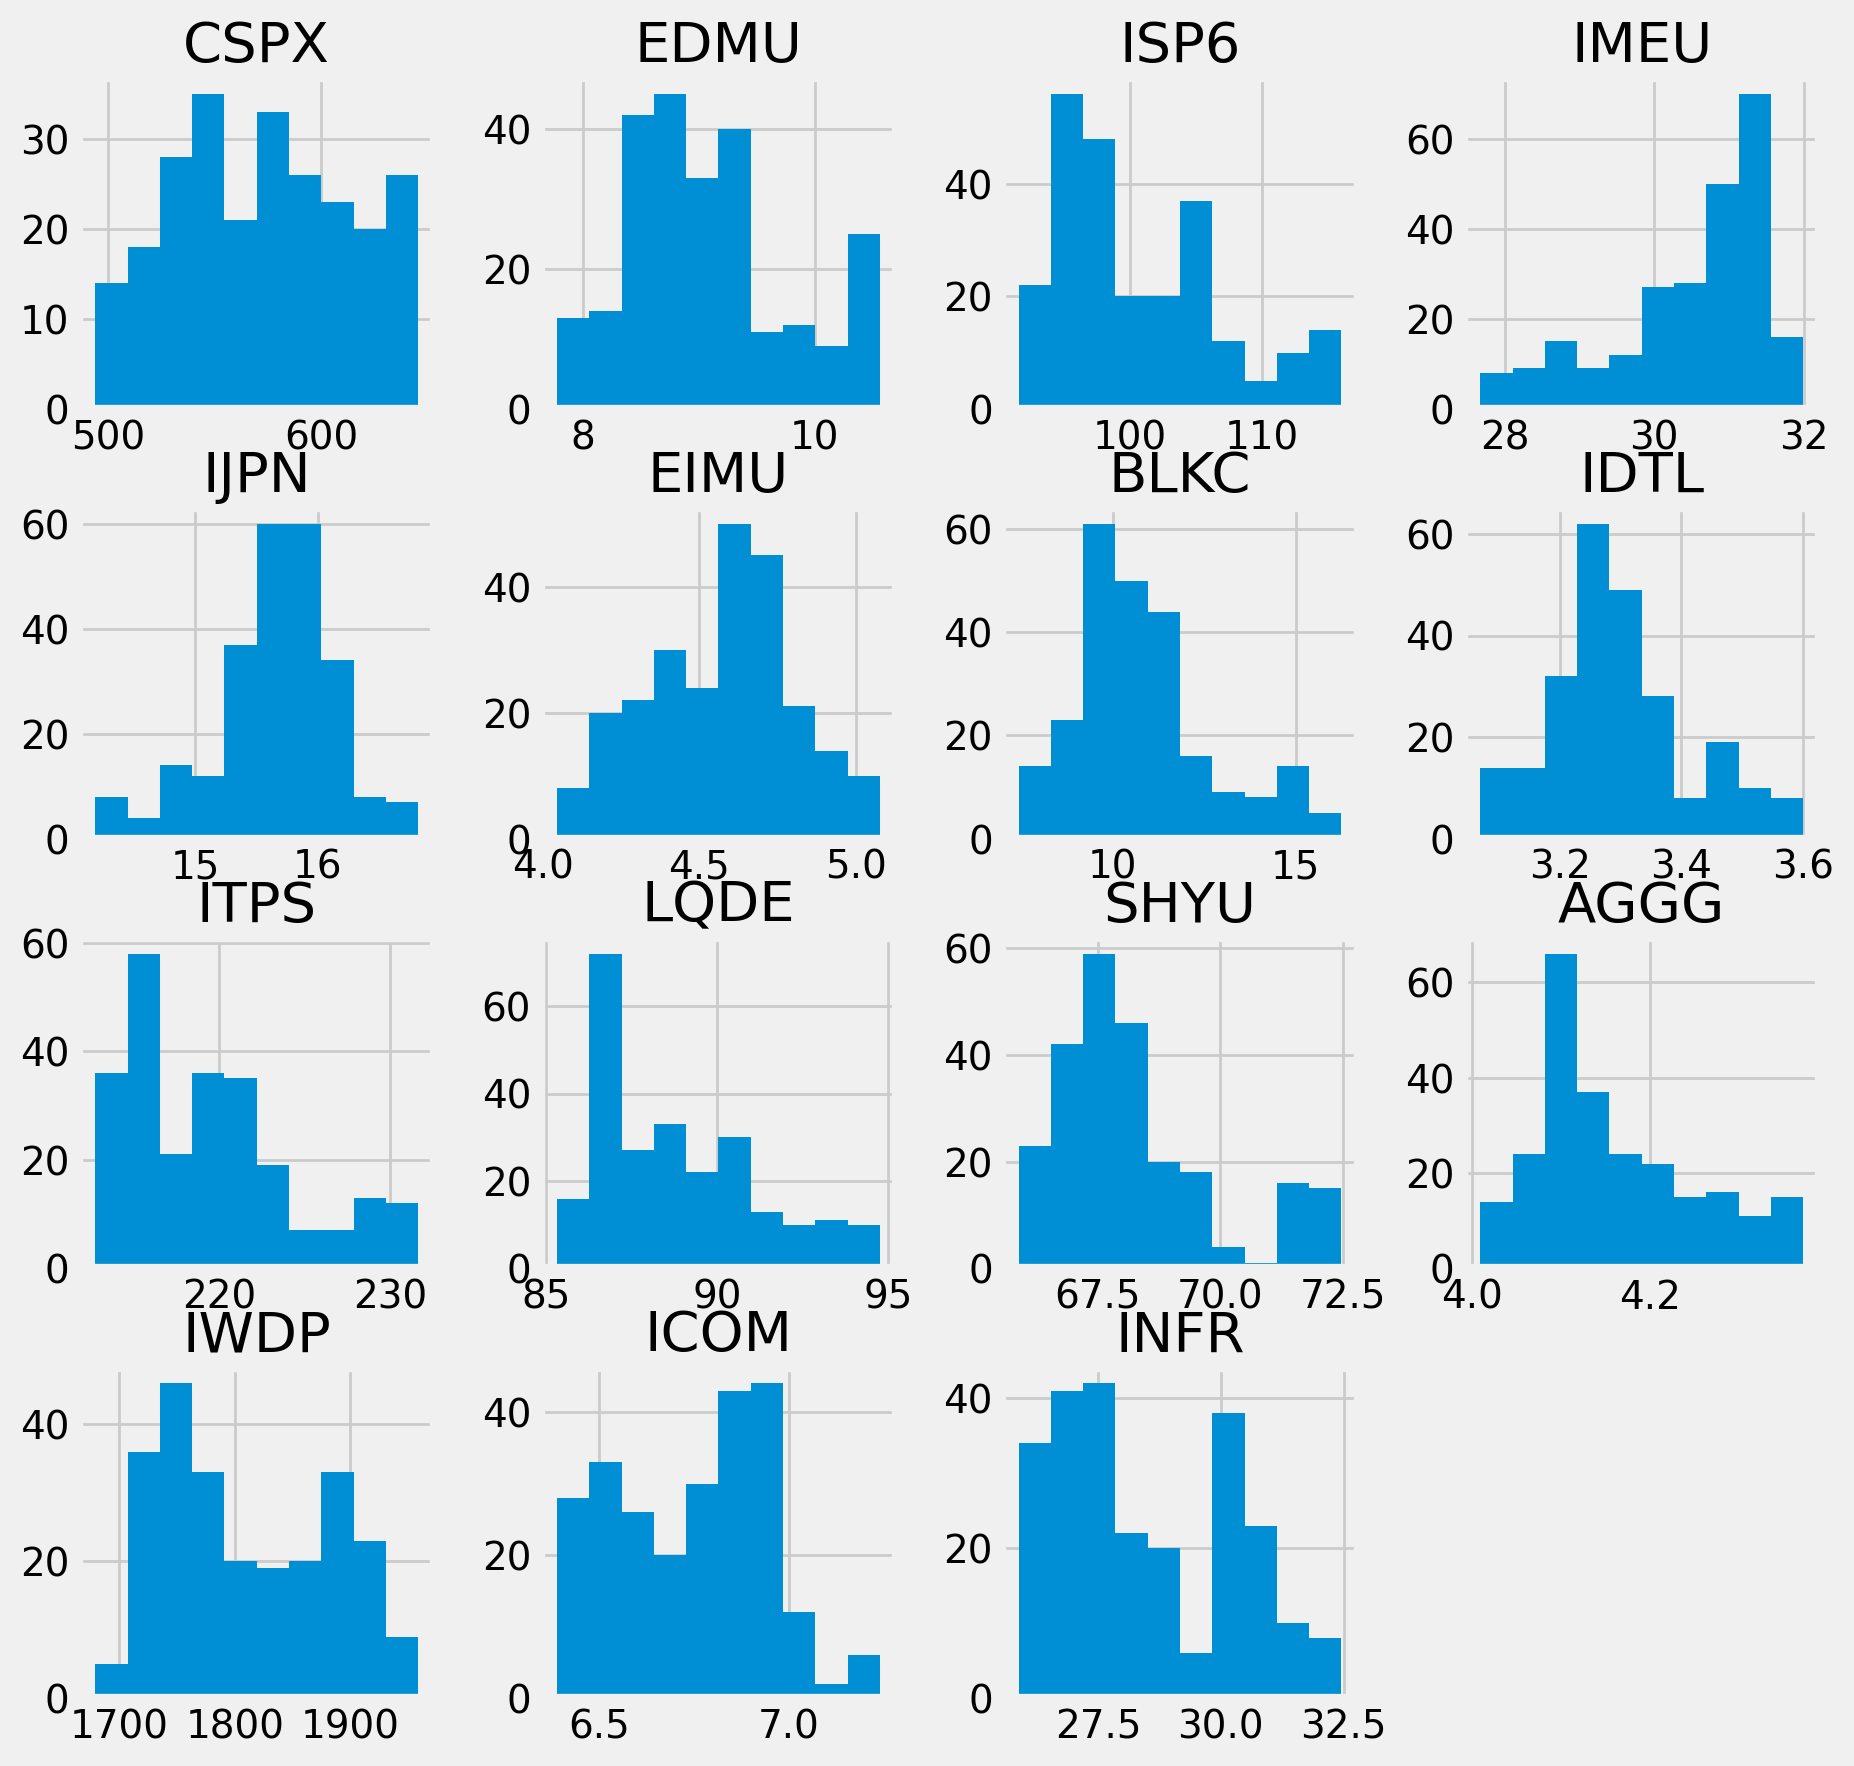

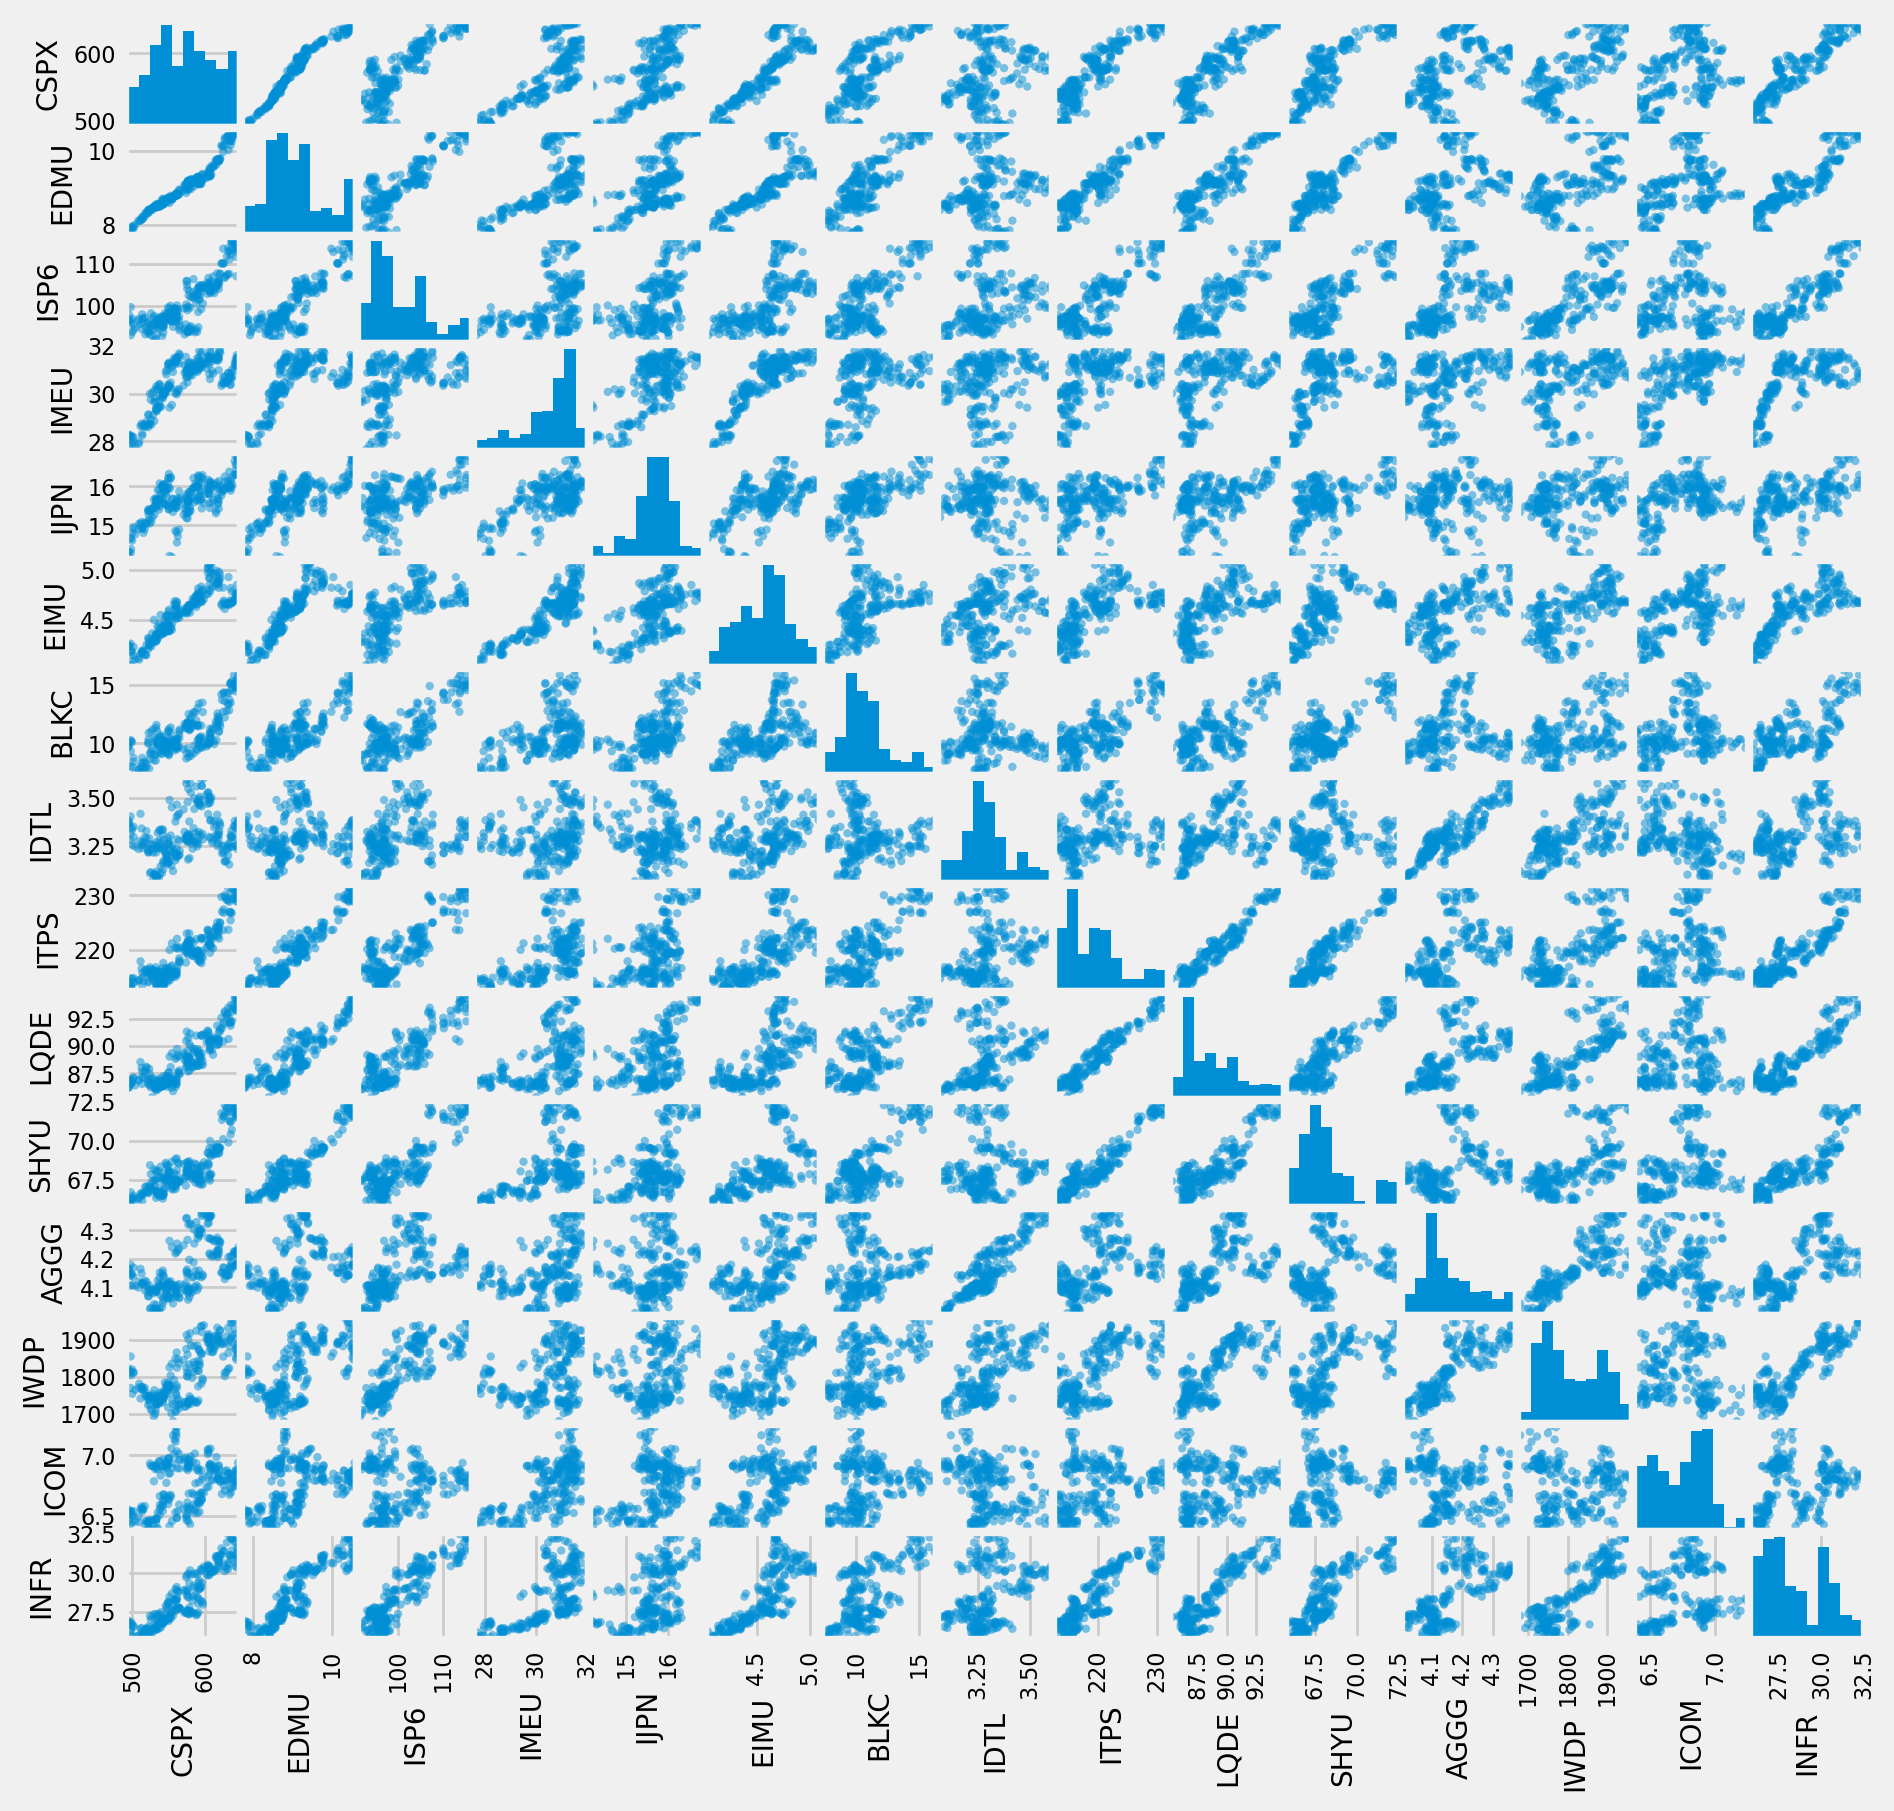

In [27]:
dataset.hist(figsize=(10,10))

scatter_matrix = pd.plotting.scatter_matrix(dataset[dataset.columns], figsize=(10,10))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
plt.show()

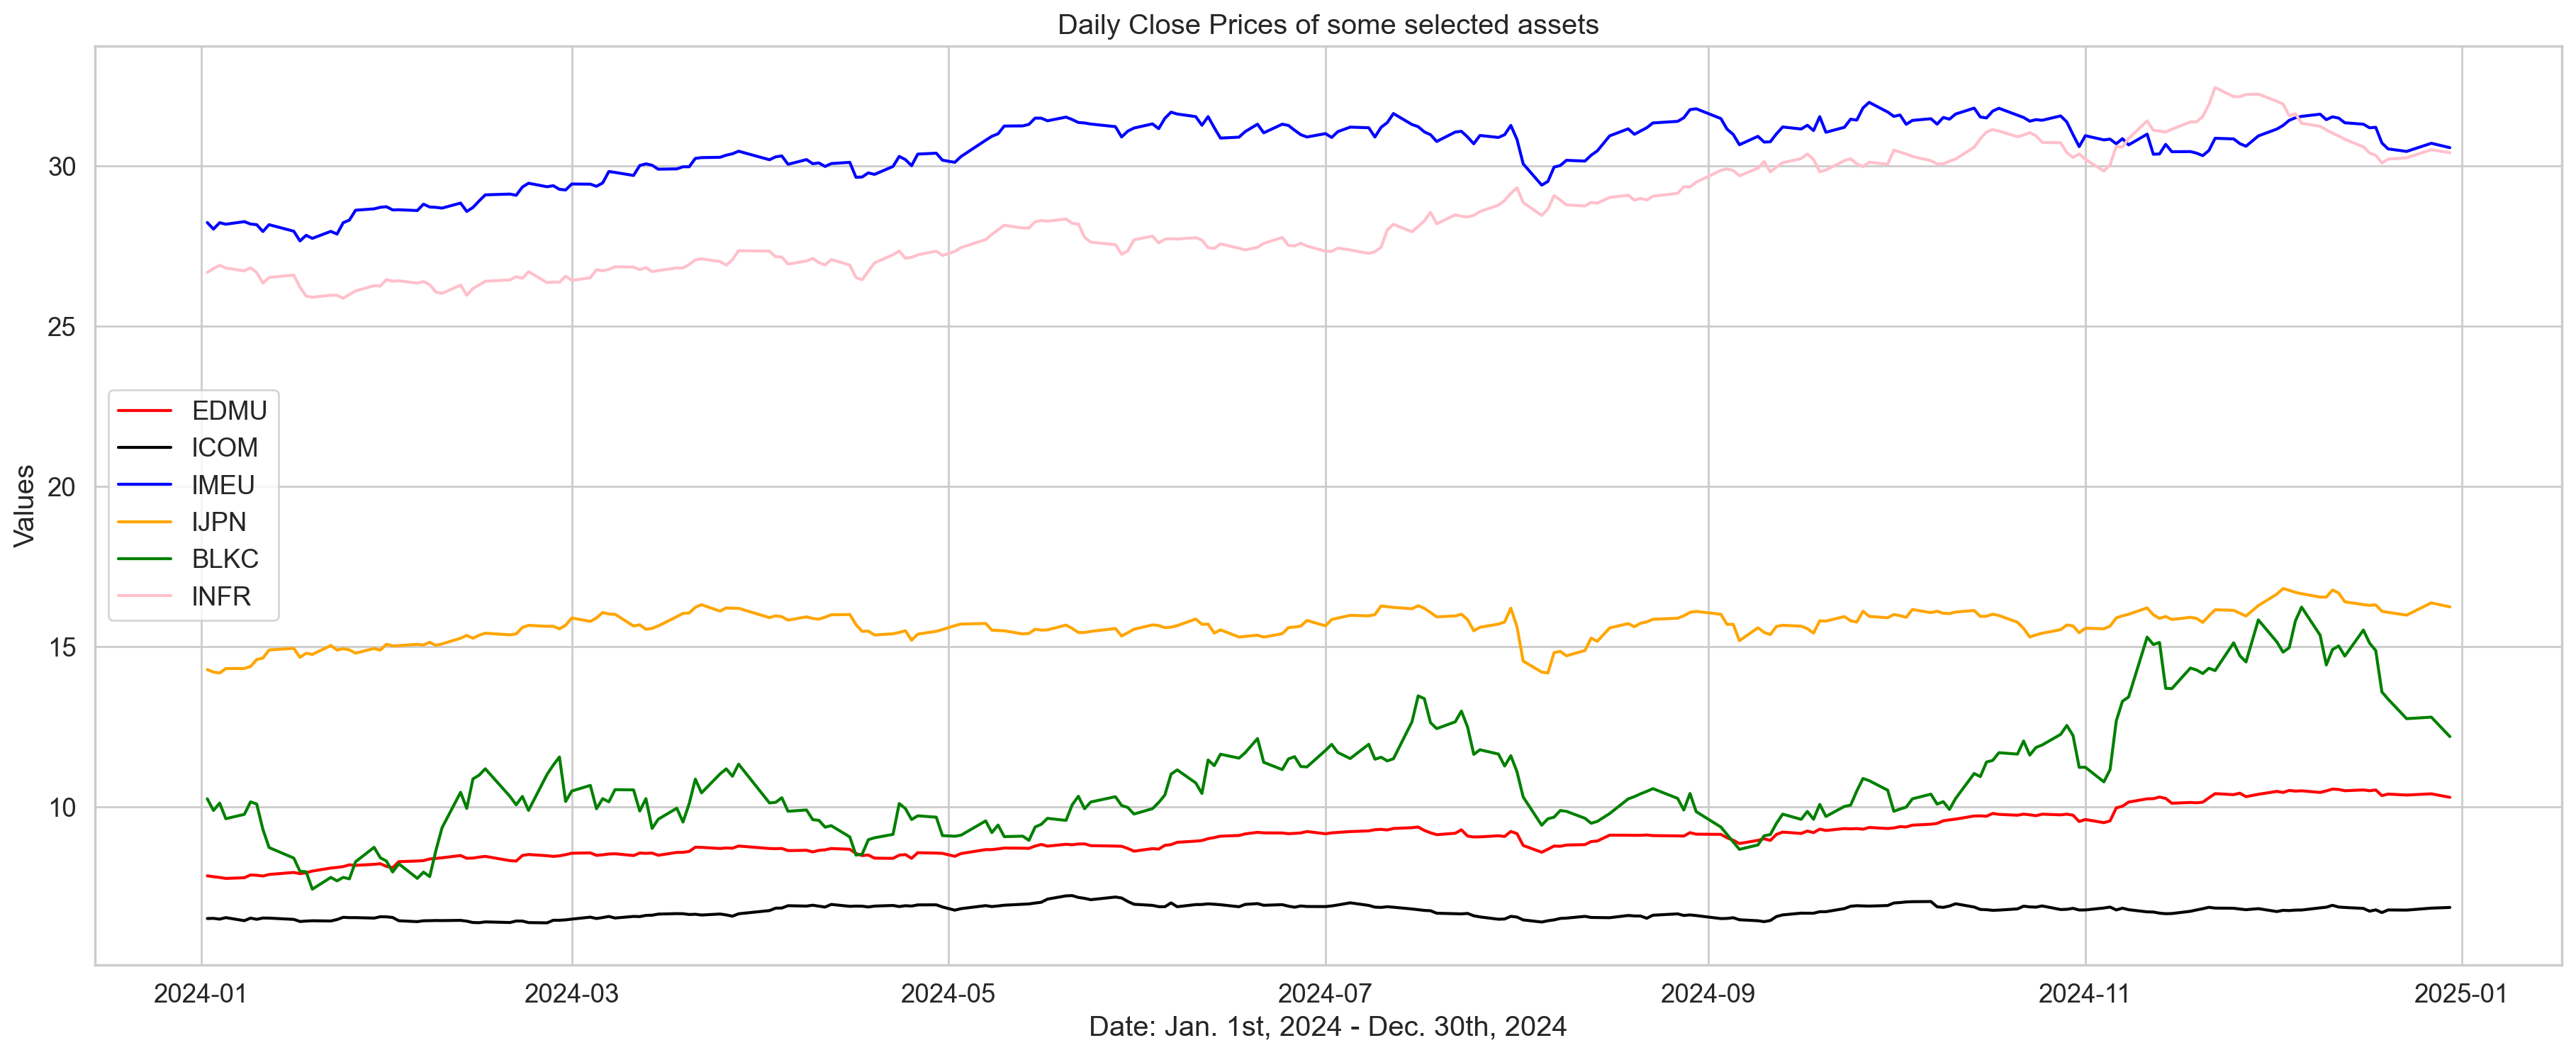

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10

plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of some selected assets')
plt.xlabel('Date: Jan. 1st, 2024 - Dec. 30th, 2024')
plt.ylabel('Values')
plt.plot(dataset['EDMU'], 'red',    label='EDMU')
plt.plot(dataset['ICOM'], 'black',  label='ICOM')
plt.plot(dataset['IMEU'], 'blue',   label='IMEU')
plt.plot(dataset['IJPN'], 'orange', label='IJPN')
plt.plot(dataset['BLKC'], 'green',  label='BLKC')
plt.plot(dataset['INFR'], 'pink',   label='INFR')
plt.legend()
plt.show()

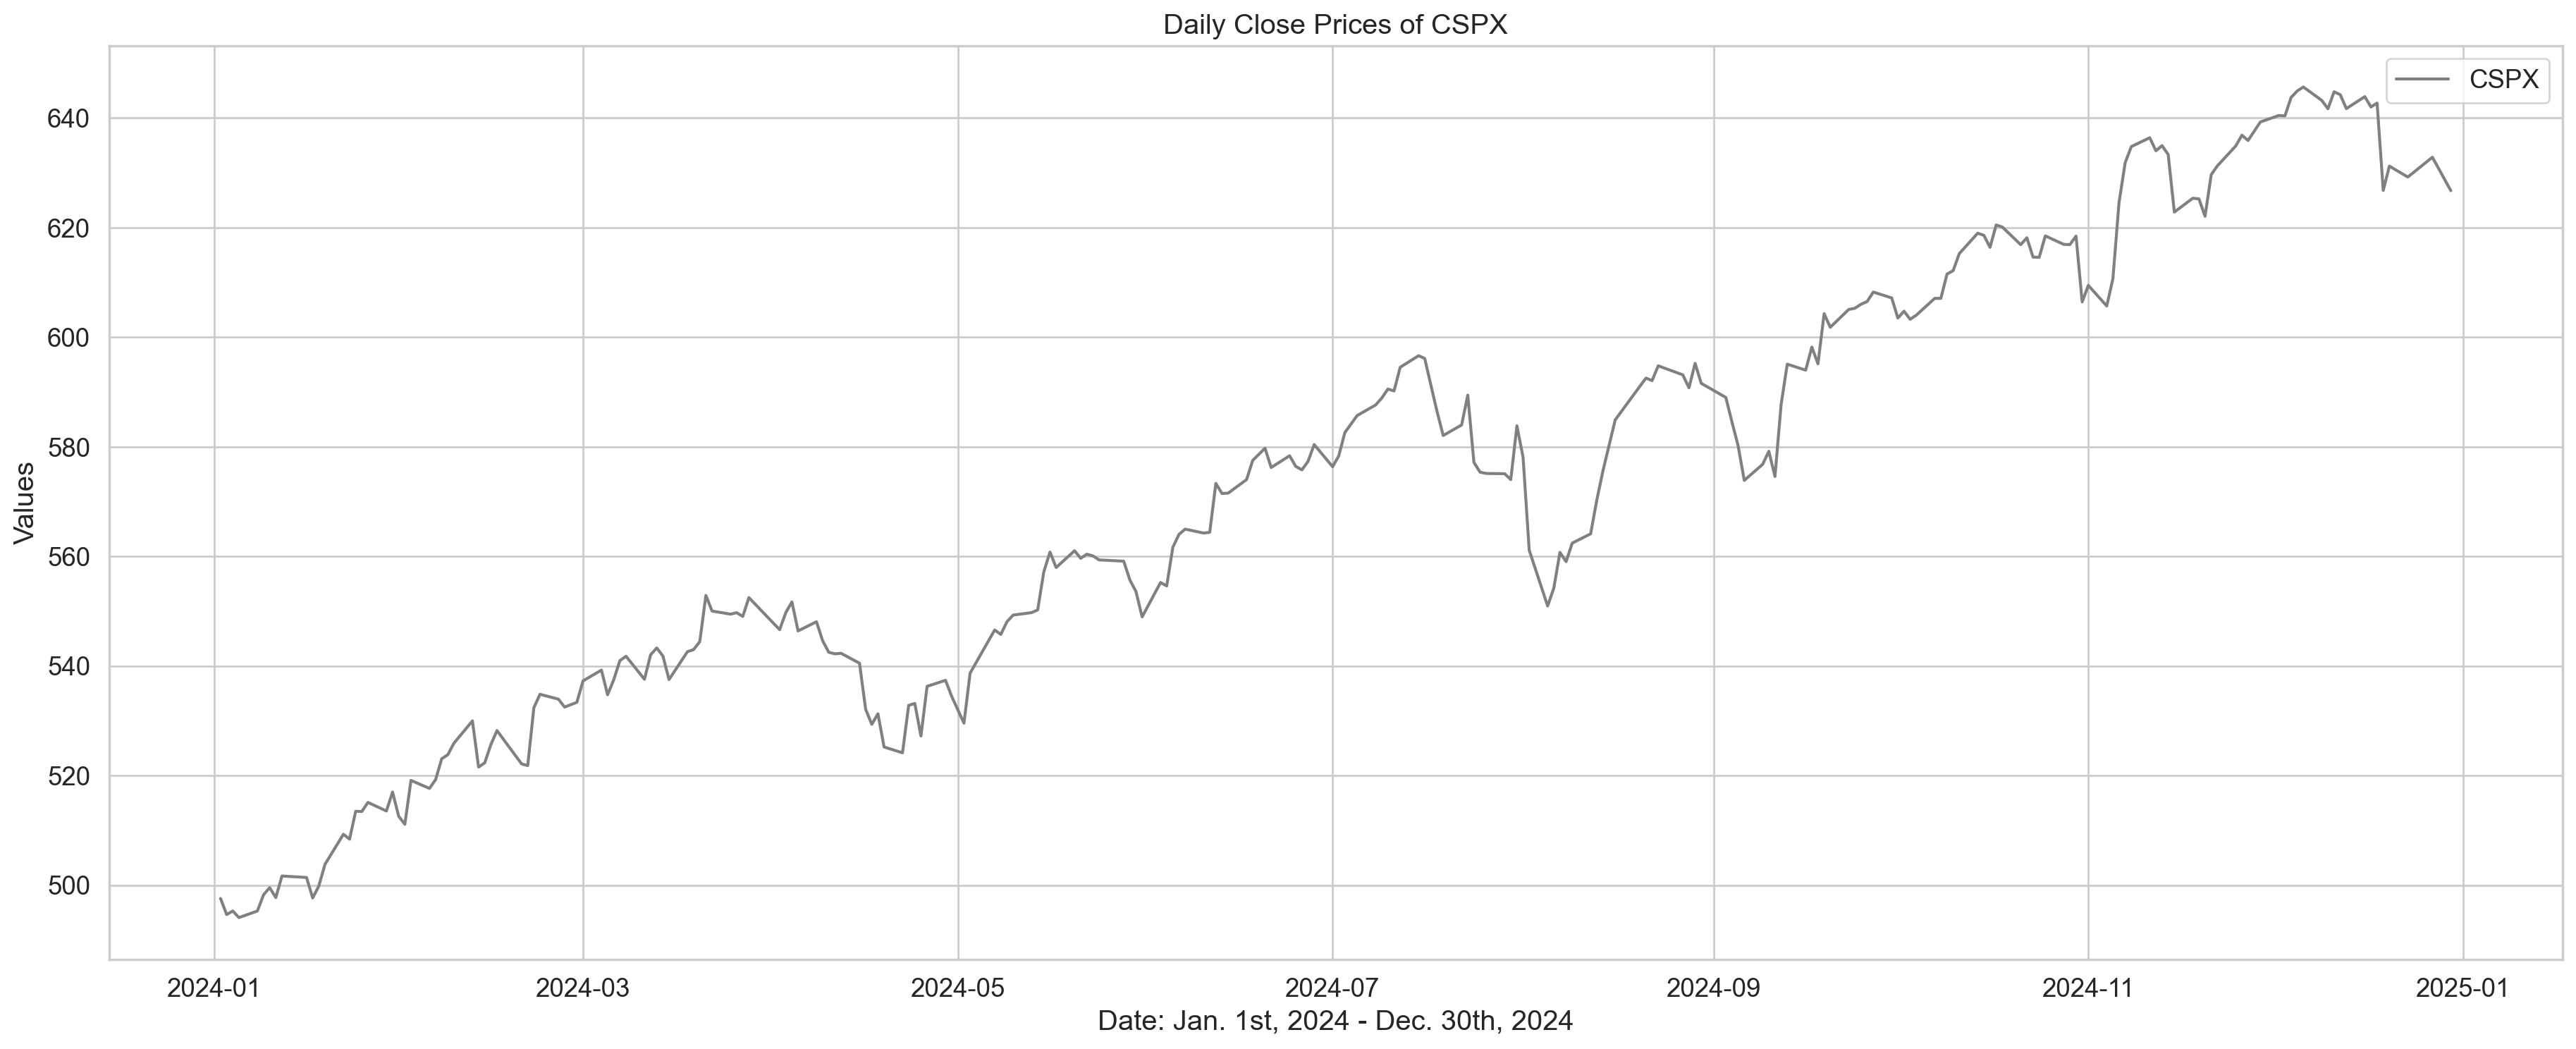

In [29]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of CSPX')
plt.xlabel('Date: Jan. 1st, 2024 - Dec. 30th, 2024')
plt.ylabel('Values')
plt.plot(dataset['CSPX'], 'grey', label='CSPX')
plt.legend()
plt.show()

In [30]:
#Create a new columns Return in the dataset for each company's

# Question 1: can you write these lines more efficiently by using for loops?
# Question 2: why does the first line have many NaNs?

dataset['R_CSPX'] = dataset[['CSPX']].pct_change(1)
dataset['R_EDMU'] = dataset[['EDMU']].pct_change(1)
dataset['R_ISP6'] = dataset[['ISP6']].pct_change(1)
dataset['R_IMEU'] = dataset[['IMEU']].pct_change(1)
dataset['R_IJPN'] = dataset[['IJPN']].pct_change(1)
dataset['R_EIMU'] = dataset[['EIMU']].pct_change(1)
dataset['R_BLKC'] = dataset[['BLKC']].pct_change(1)
dataset['R_IDTL'] = dataset[['IDTL']].pct_change(1)
dataset['R_ITPS'] = dataset[['ITPS']].pct_change(1)
dataset['R_LQDE'] = dataset[['LQDE']].pct_change(1)
dataset['R_SHYU'] = dataset[['SHYU']].pct_change(1)
dataset['R_AGGG'] = dataset[['AGGG']].pct_change(1)
dataset['R_IWDP'] = dataset[['IWDP']].pct_change(1)
dataset['R_ICOM'] = dataset[['ICOM']].pct_change(1)
dataset['R_INFR'] = dataset[['INFR']].pct_change(1)

dataset

#dataset.to_csv('dataset_3.csv', index=False) 
#dataset.to_csv('dataset_4.csv', index=True) 

CSPX    EDMU        ISP6       IMEU       IJPN      EIMU  \
Date                                                                         
2024-01-02  497.589996   7.858   99.636482  28.243128  14.293220  4.260418   
2024-01-03  494.649994   7.829   96.524666  28.039051  14.216026  4.235565   
2024-01-04  495.299988   7.807   96.340469  28.238382  14.185150  4.240345   
2024-01-05  494.100006   7.776   96.447113  28.190924  14.324096  4.250860   
2024-01-08  495.299988   7.798   97.833374  28.271603  14.327956  4.238433   
...                ...     ...         ...        ...        ...       ...   
2024-12-19  626.799988  10.360  106.591682  30.726391  16.112793  4.657443   
2024-12-20  631.229980  10.408  107.490234  30.540882  16.078497  4.656953   
2024-12-23  629.239990  10.378  107.243370  30.462772  15.992270  4.654506   
2024-12-27  632.849976  10.416  107.509987  30.716629  16.375395  4.648633   
2024-12-30  626.750000  10.306  106.828659  30.579935  16.249971  4.608994   

               BLKC      IDTL        ITPS       LQDE  ...    R_EIMU    R_BLKC  \
Date                                                  ...                       
2024-01-02  10.2613  3.402815  213.630005  86.932899  ...       NaN       NaN   
2024-01-03   9.8962  3.383134  214.270004  86.611725  ... -0.005834 -0.035580   
2024-01-04  10.1267  3.371420  213.059998  86.189636  ...  0.001128  0.023292   
2024-01-05   9.6393  3.359237  212.940002  86.171288  ...  0.002480 -0.048130   
2024-01-08   9.7758  3.367203  212.979996  86.299767  ... -0.002923  0.014161   
...             ...       ...         ...        ...  ...       ...       ...   
2024-12-19  13.5961  3.172910  229.699997  93.060577  ... -0.012759 -0.086713   
2024-12-20  13.3709  3.201795  229.029999  93.012390  ... -0.000105 -0.016564   
2024-12-23  12.7613  3.174868  229.139999  92.829315  ... -0.000525 -0.045592   
2024-12-27  12.8085  3.154796  228.789993  92.511345  ... -0.001262  0.003699   
2024-12-30  12.2018  3.169972  230.009995  93.185837  ... -0.008527 -0.047367   

              R_IDTL    R_ITPS    R_LQDE    R_SHYU    R_AGGG    R_IWDP  \
Date                                                                     
2024-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-03 -0.005784  0.002996 -0.003695 -0.006543 -0.003387 -0.017511   
2024-01-04 -0.003463 -0.005647 -0.004873 -0.002332 -0.003851 -0.004661   
2024-01-05 -0.003614 -0.000563 -0.000213 -0.003507  0.002047 -0.004132   
2024-01-08  0.002371  0.000188  0.001491  0.000621  0.001589  0.004979   
...              ...       ...       ...       ...       ...       ...   
2024-12-19 -0.023652  0.000348 -0.004843  0.001556 -0.009508 -0.024367   
2024-12-20  0.009104 -0.002917 -0.000518  0.002702  0.000117  0.010545   
2024-12-23 -0.008410  0.000480 -0.001968  0.002762  0.000234 -0.004256   
2024-12-27 -0.006322 -0.001527 -0.003425 -0.003829  0.000000  0.005791   
2024-12-30  0.004811  0.005332  0.007291  0.005934 -0.003277 -0.006581   

              R_ICOM    R_INFR  
Date                            
2024-01-02       NaN       NaN  
2024-01-03  0.000766  0.004311  
2024-01-04 -0.003828  0.003935  
2024-01-05  0.007302 -0.003207  
2024-01-08 -0.014498 -0.003217  
...              ...       ...  
2024-12-19 -0.012509 -0.007930  
2024-12-20  0.012295  0.004078  
2024-12-23 -0.000736  0.001300  
2024-12-27  0.009024  0.008437  
2024-12-30  0.003103 -0.003218  

[244 rows x 30 columns]

In [31]:
dataset.describe()

CSPX        EDMU        ISP6        IMEU        IJPN        EIMU  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean   572.168566    9.072422  100.649846   30.491012   15.665035    4.572711   
std     40.769107    0.693527    6.195113    1.046551    0.499744    0.231935   
min    494.100006    7.776000   91.573967   27.668869   14.185150    4.045342   
25%    540.872498    8.566750   95.846077   30.011096   15.430978    4.387433   
50%    574.030029    8.991000   98.350555   30.866800   15.685853    4.612226   
75%    605.394989    9.369500  104.750891   31.303679   15.987017    4.726418   
max    645.669983   10.564000  116.023308   31.993839   16.822208    5.077332   

             BLKC        IDTL        ITPS        LQDE  ...      R_EIMU  \
count  244.000000  244.000000  244.000000  244.000000  ...  243.000000   
mean    10.847192    3.300733  219.547827   88.845595  ...    0.000367   
std      1.874105    0.113232    4.912898    2.335462  ...    0.009360   
min      7.440500    3.069656  212.779999   85.320038  ...   -0.029963   
25%      9.638800    3.232721  215.600006   86.772322  ...   -0.004329   
50%     10.327300    3.281998  219.099998   88.335163  ...    0.000104   
75%     11.630325    3.357064  222.059994   90.503887  ...    0.004893   
max     16.241600    3.599636  231.649994   94.749237  ...    0.027883   

           R_BLKC      R_IDTL      R_ITPS      R_LQDE      R_SHYU      R_AGGG  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.001631   -0.000251    0.000311    0.000294    0.000336   -0.000043   
std      0.043073    0.009011    0.003768    0.004118    0.003523    0.003944   
min     -0.119973   -0.029633   -0.011418   -0.011074   -0.008690   -0.011550   
25%     -0.026279   -0.006103   -0.002015   -0.002363   -0.002102   -0.002164   
50%      0.004040   -0.000432    0.000046   -0.000212    0.000272    0.000234   
75%      0.026389    0.005382    0.002040    0.002904    0.002112    0.002330   
max      0.138916    0.025816    0.015027    0.013659    0.012265    0.013631   

           R_IWDP      R_ICOM      R_INFR  
count  243.000000  243.000000  243.000000  
mean    -0.000070    0.000238    0.000559  
std      0.007630    0.007253    0.006451  
min     -0.024367   -0.023388   -0.015710  
25%     -0.005054   -0.003923   -0.003218  
50%      0.000425    0.000000    0.000732  
75%      0.005191    0.005030    0.004585  
max      0.022033    0.019342    0.019774  

[8 rows x 30 columns]

In [32]:
# Daily volatility of each stock
dataset[dataset.columns[15:]].std()

R_CSPX    0.007520
R_EDMU    0.008150
R_ISP6    0.013319
R_IMEU    0.006763
R_IJPN    0.011166
R_EIMU    0.009360
R_BLKC    0.043073
R_IDTL    0.009011
R_ITPS    0.003768
R_LQDE    0.004118
R_SHYU    0.003523
R_AGGG    0.003944
R_IWDP    0.007630
R_ICOM    0.007253
R_INFR    0.006451
dtype: float64

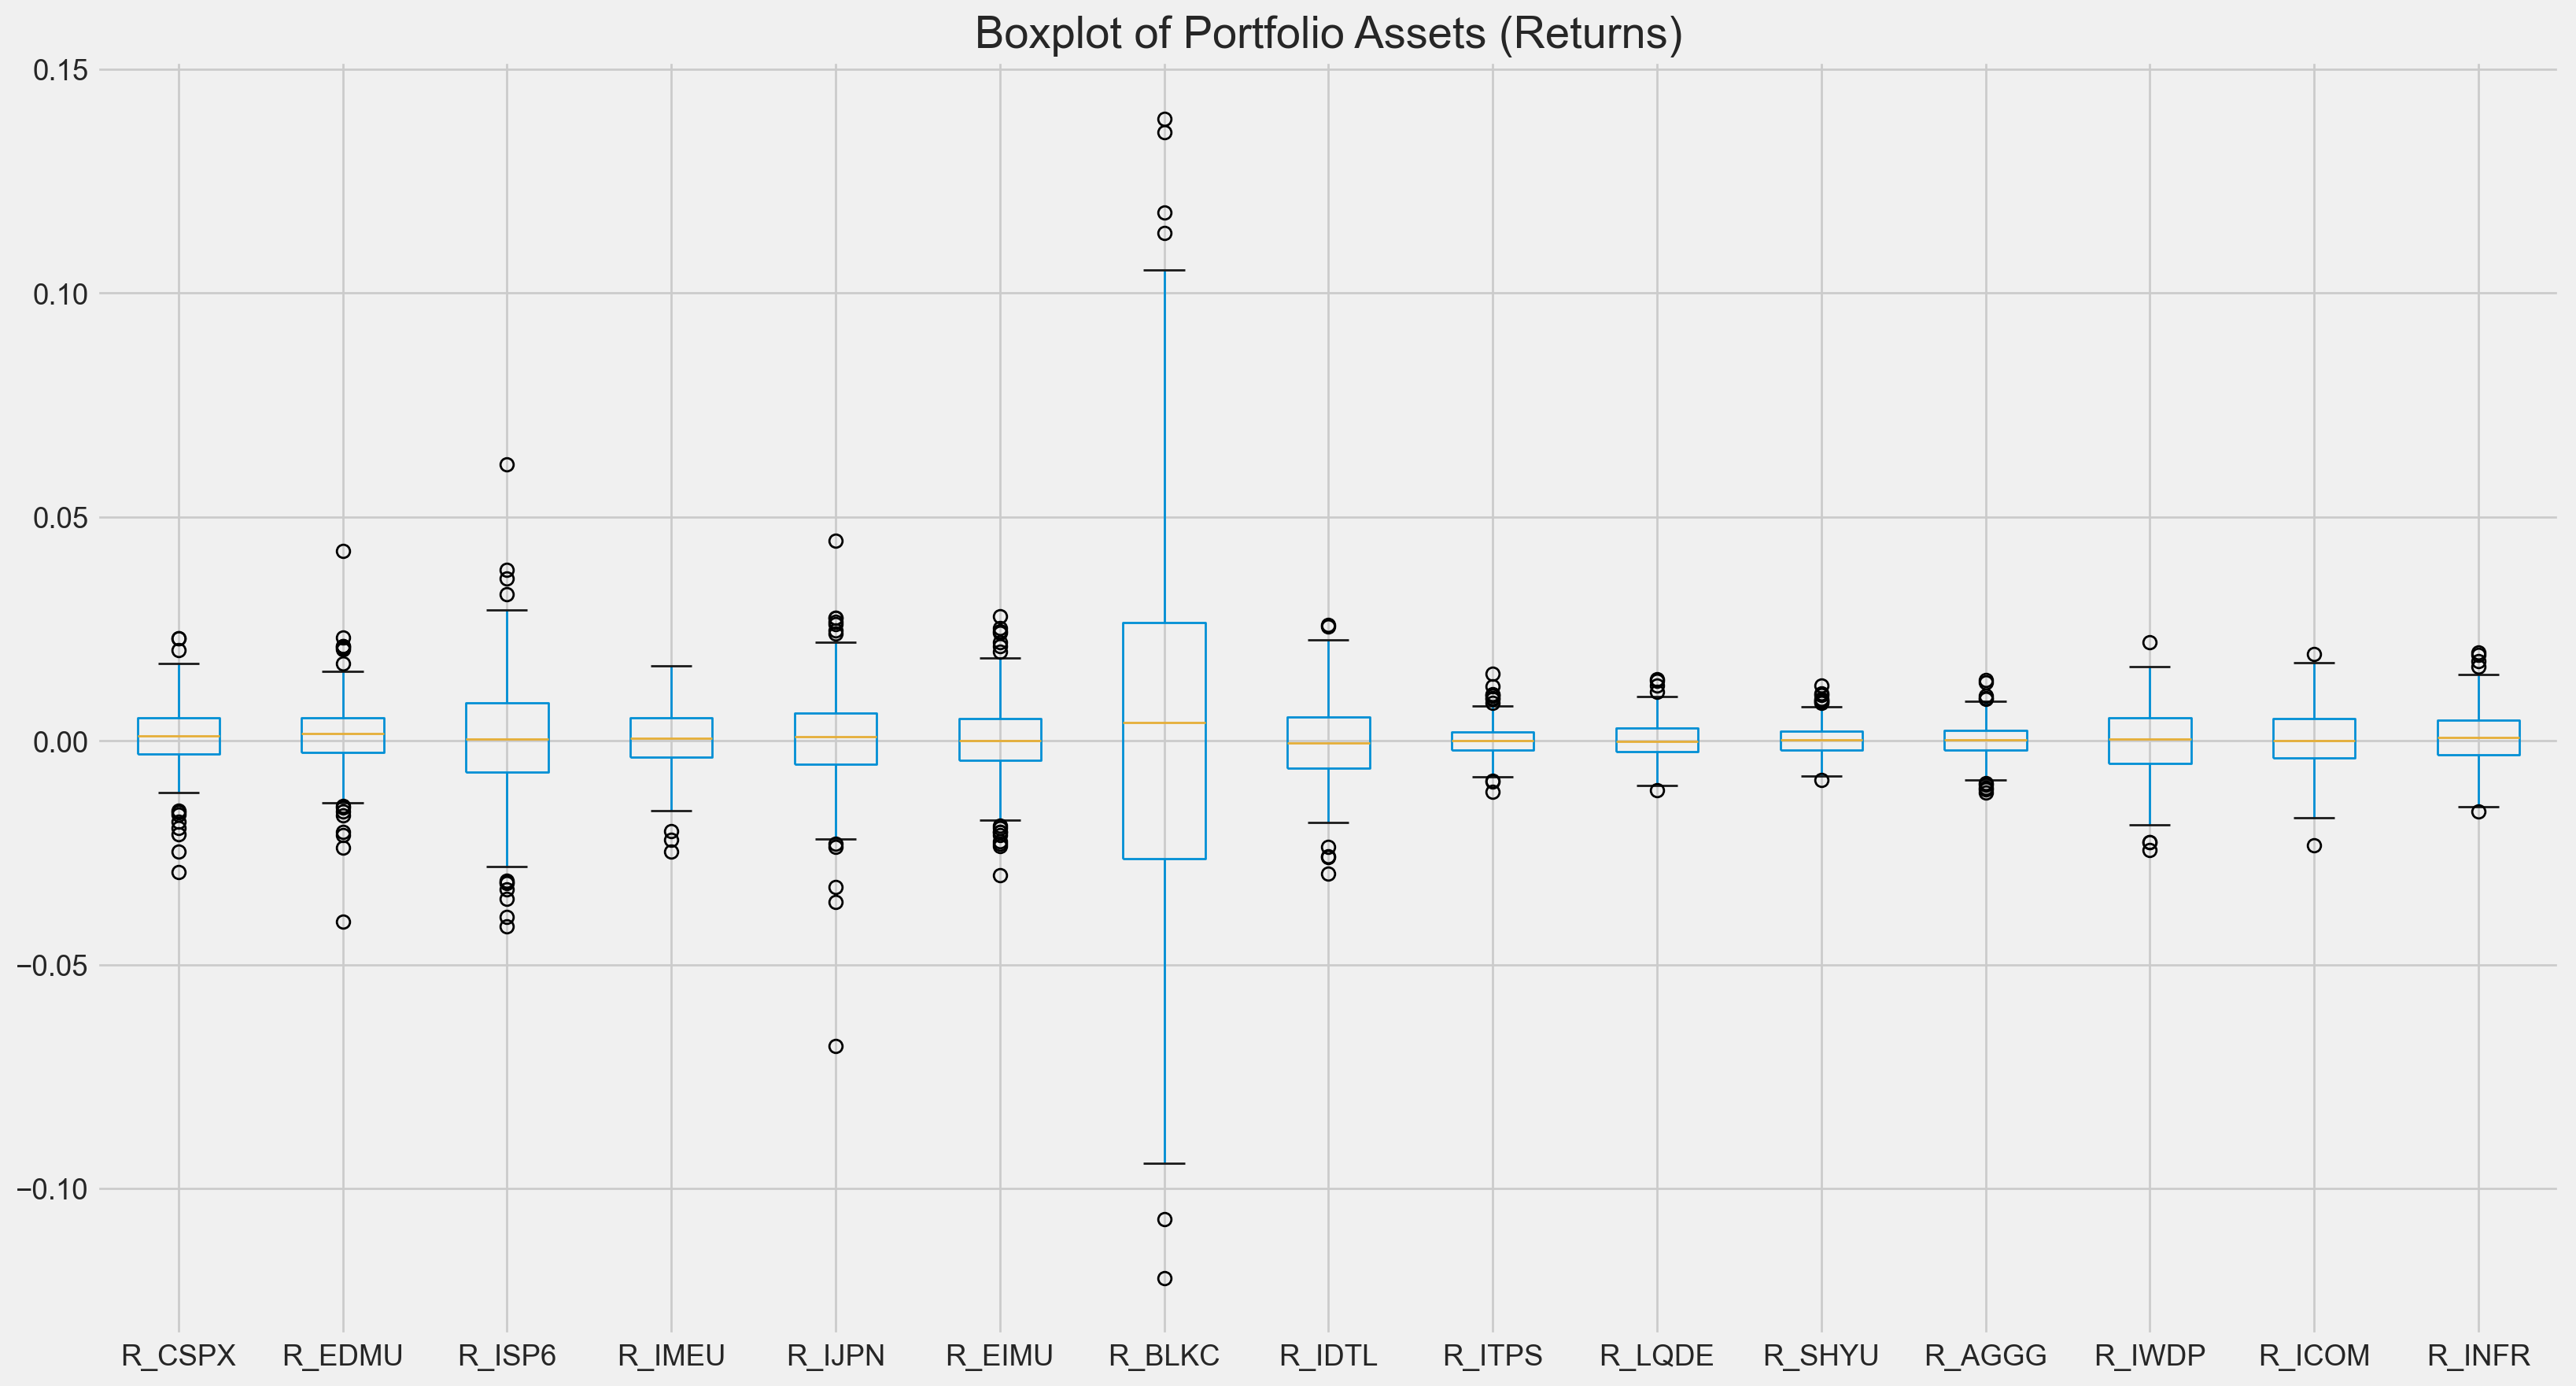

In [33]:
plt.style.use("fivethirtyeight")
dataset[dataset.columns[15:]].boxplot()
plt.title("Boxplot of Portfolio Assets (Returns)")
plt.show()

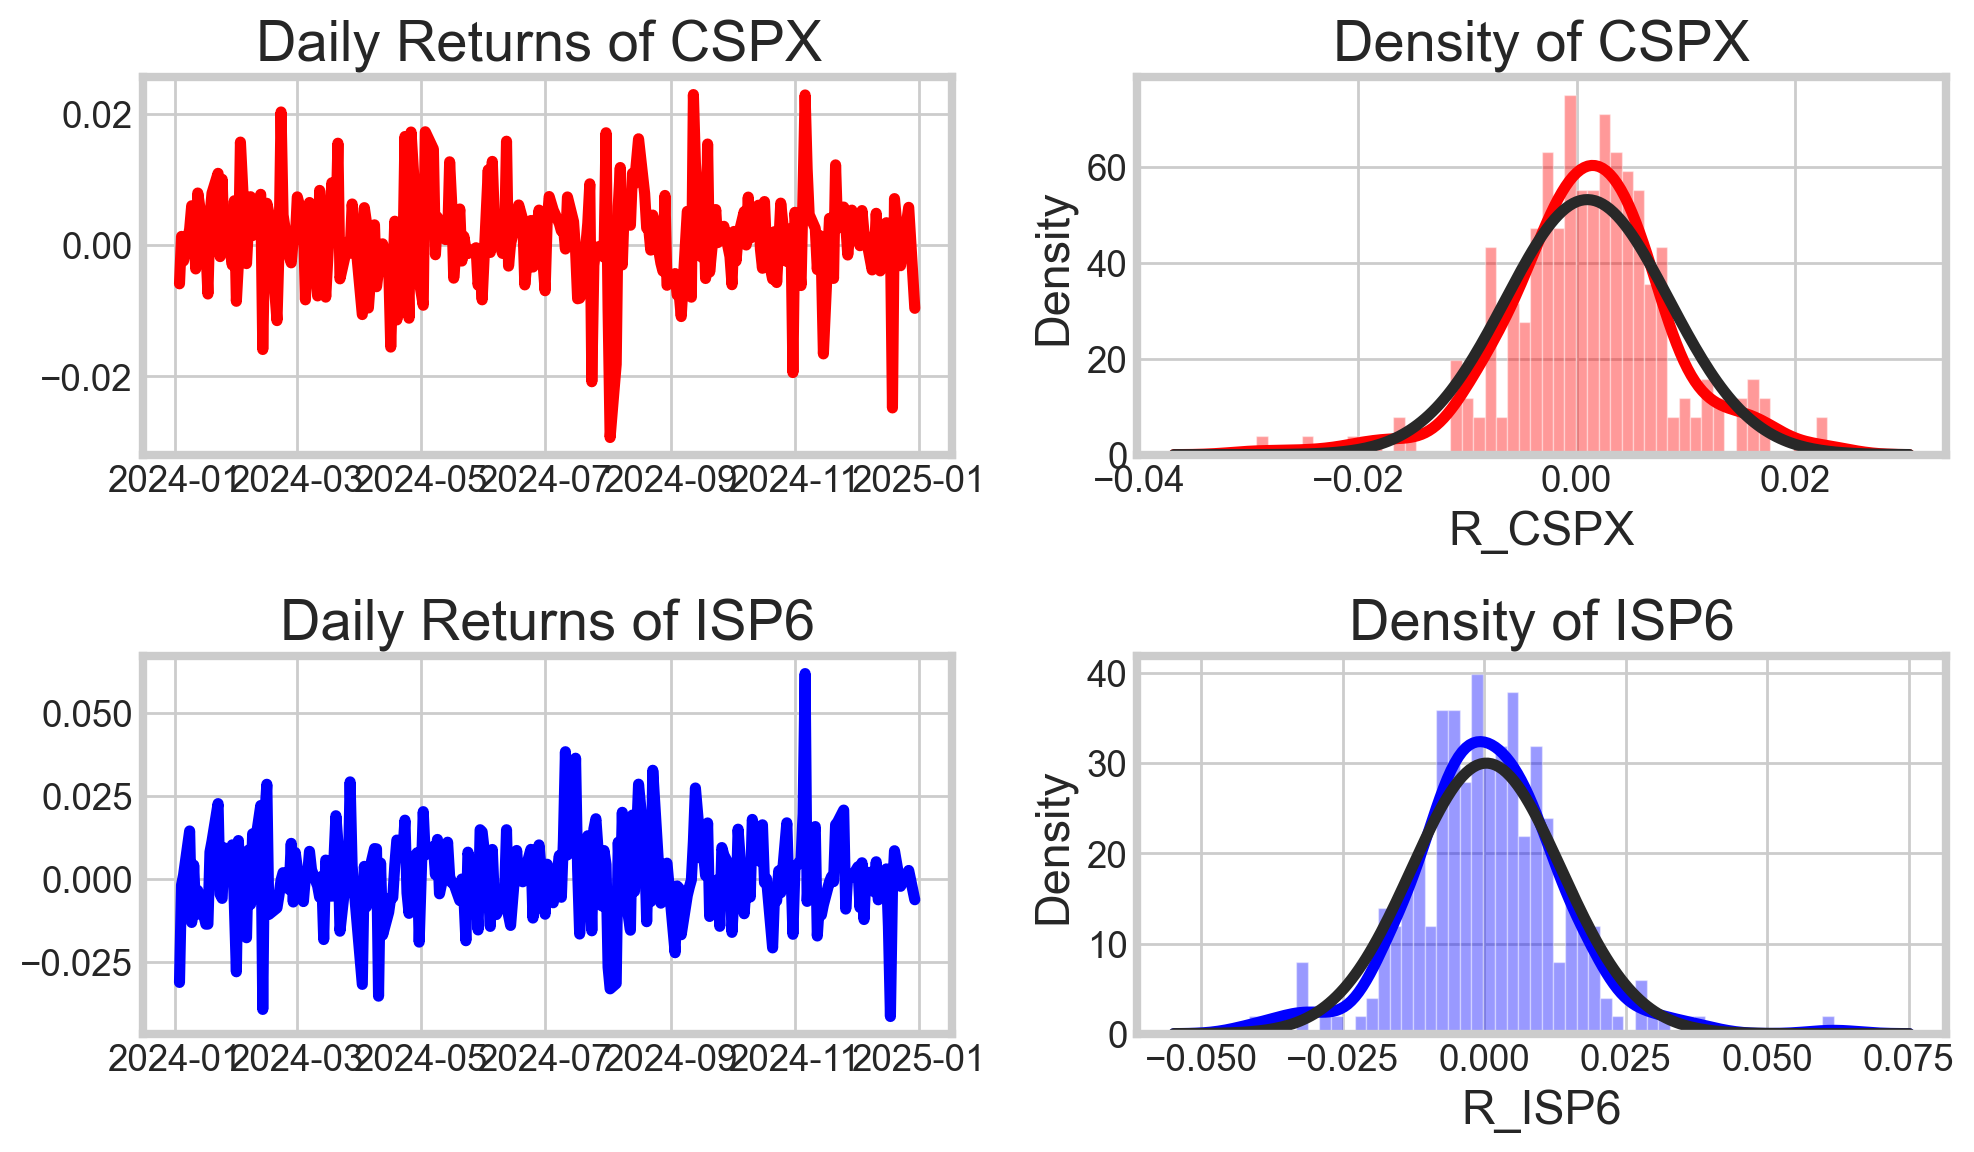

In [34]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
    axes[0][0].plot(dataset['R_CSPX'], color='red')
    axes[0][0].set_title('Daily Returns of CSPX ')
    sns.distplot(dataset['R_CSPX'], norm_hist=True, fit=stats.norm, color='red', bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of CSPX')
    axes[1][0].plot(dataset['R_ISP6'], color='blue')
    axes[1][0].set_title('Daily Returns of ISP6')
    sns.distplot(dataset['R_ISP6'], norm_hist=True, fit=stats.norm, color='blue', bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of ISP6')
    plt.tight_layout()
    #fig.show()
    plt.show()

In [35]:
dataset.columns[15:]

Index(['R_CSPX', 'R_EDMU', 'R_ISP6', 'R_IMEU', 'R_IJPN', 'R_EIMU', 'R_BLKC',
       'R_IDTL', 'R_ITPS', 'R_LQDE', 'R_SHYU', 'R_AGGG', 'R_IWDP', 'R_ICOM',
       'R_INFR'],
      dtype='object')

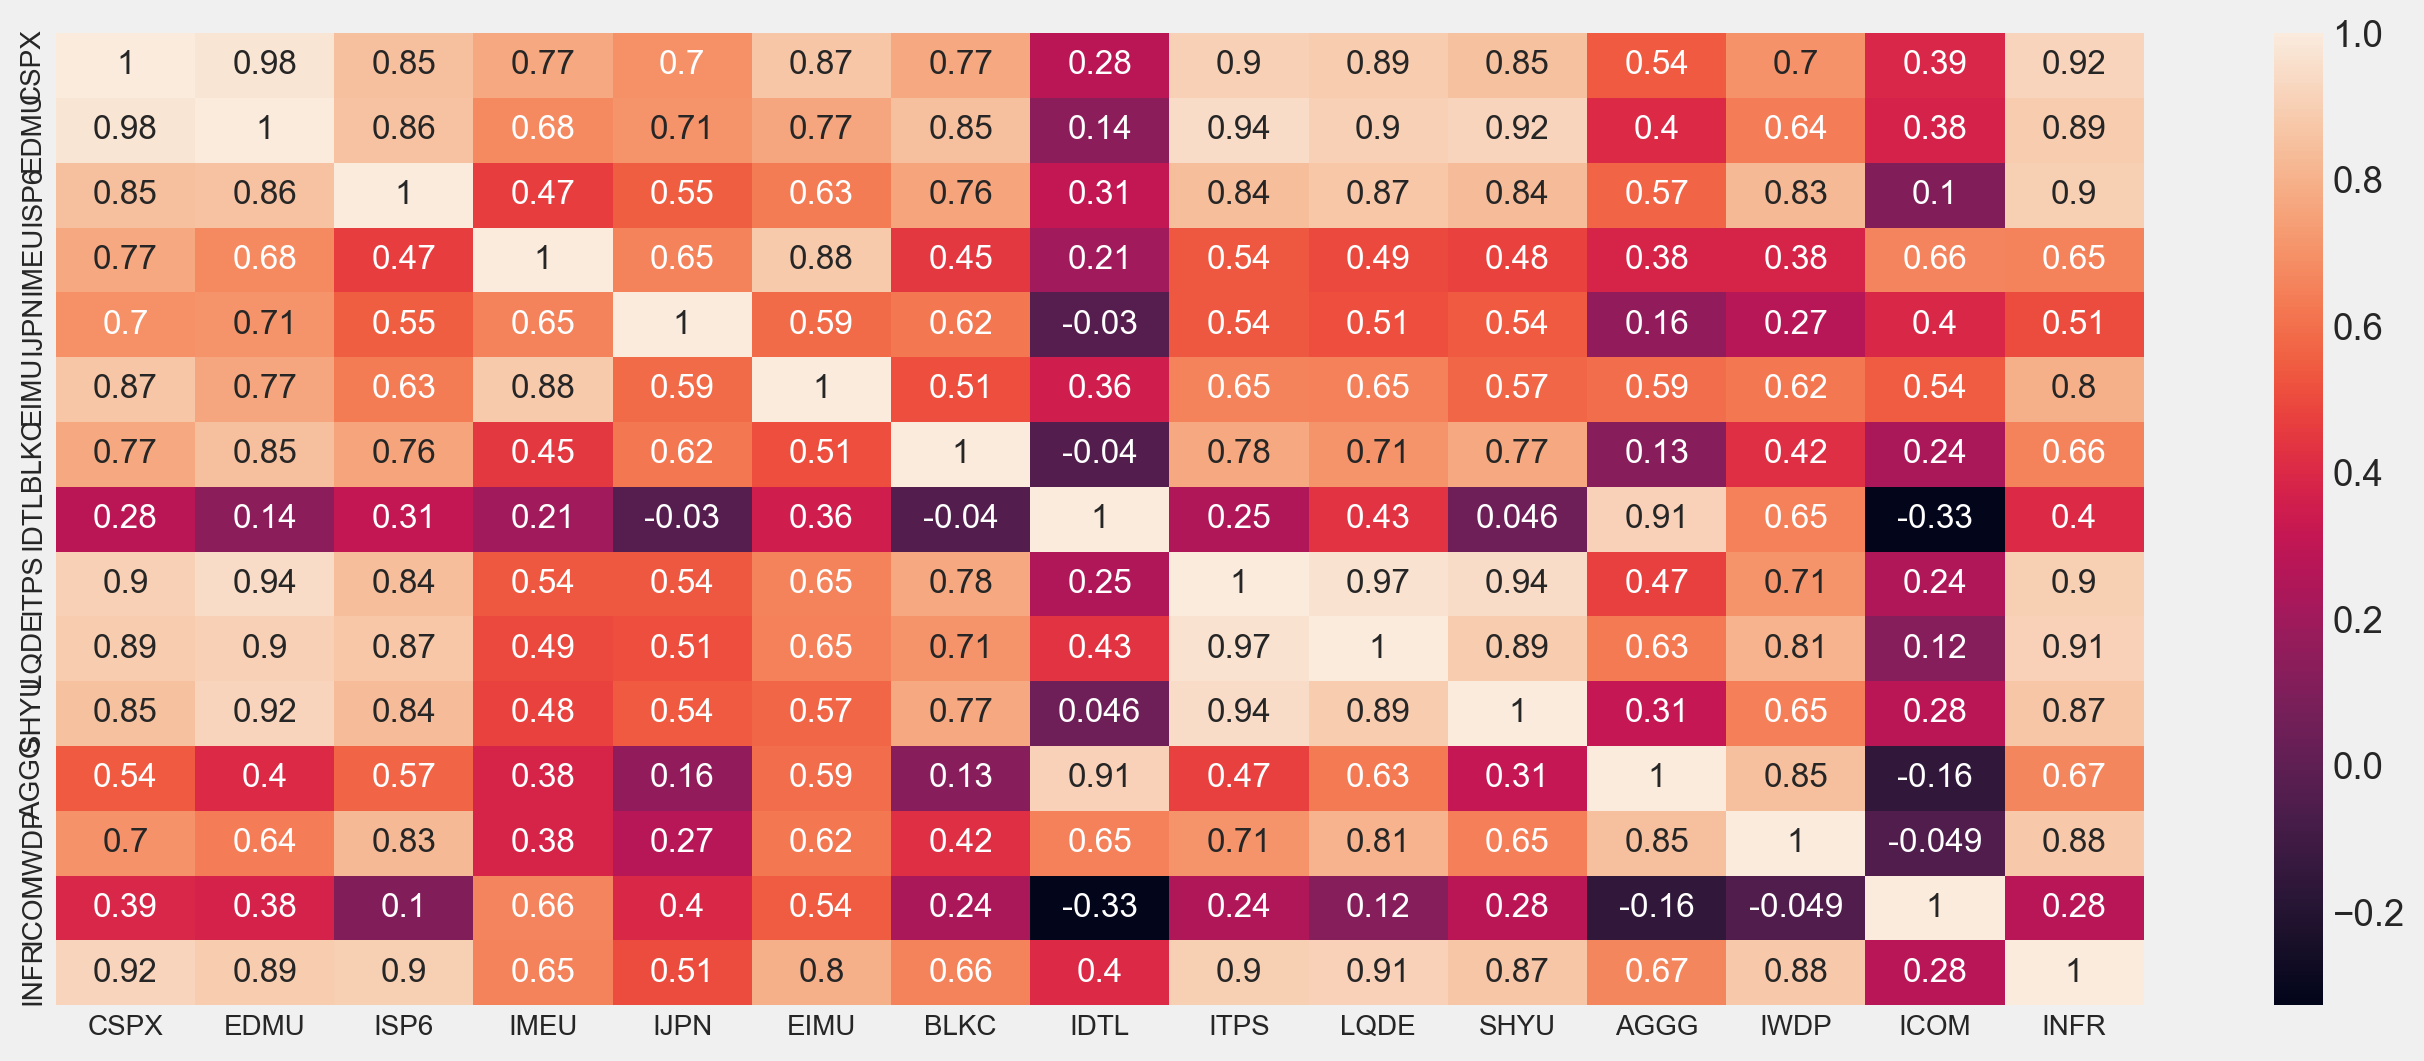

In [36]:
# Correlation coefficients between companies' closing prices
corr = dataset[dataset.columns[:15]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(15,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

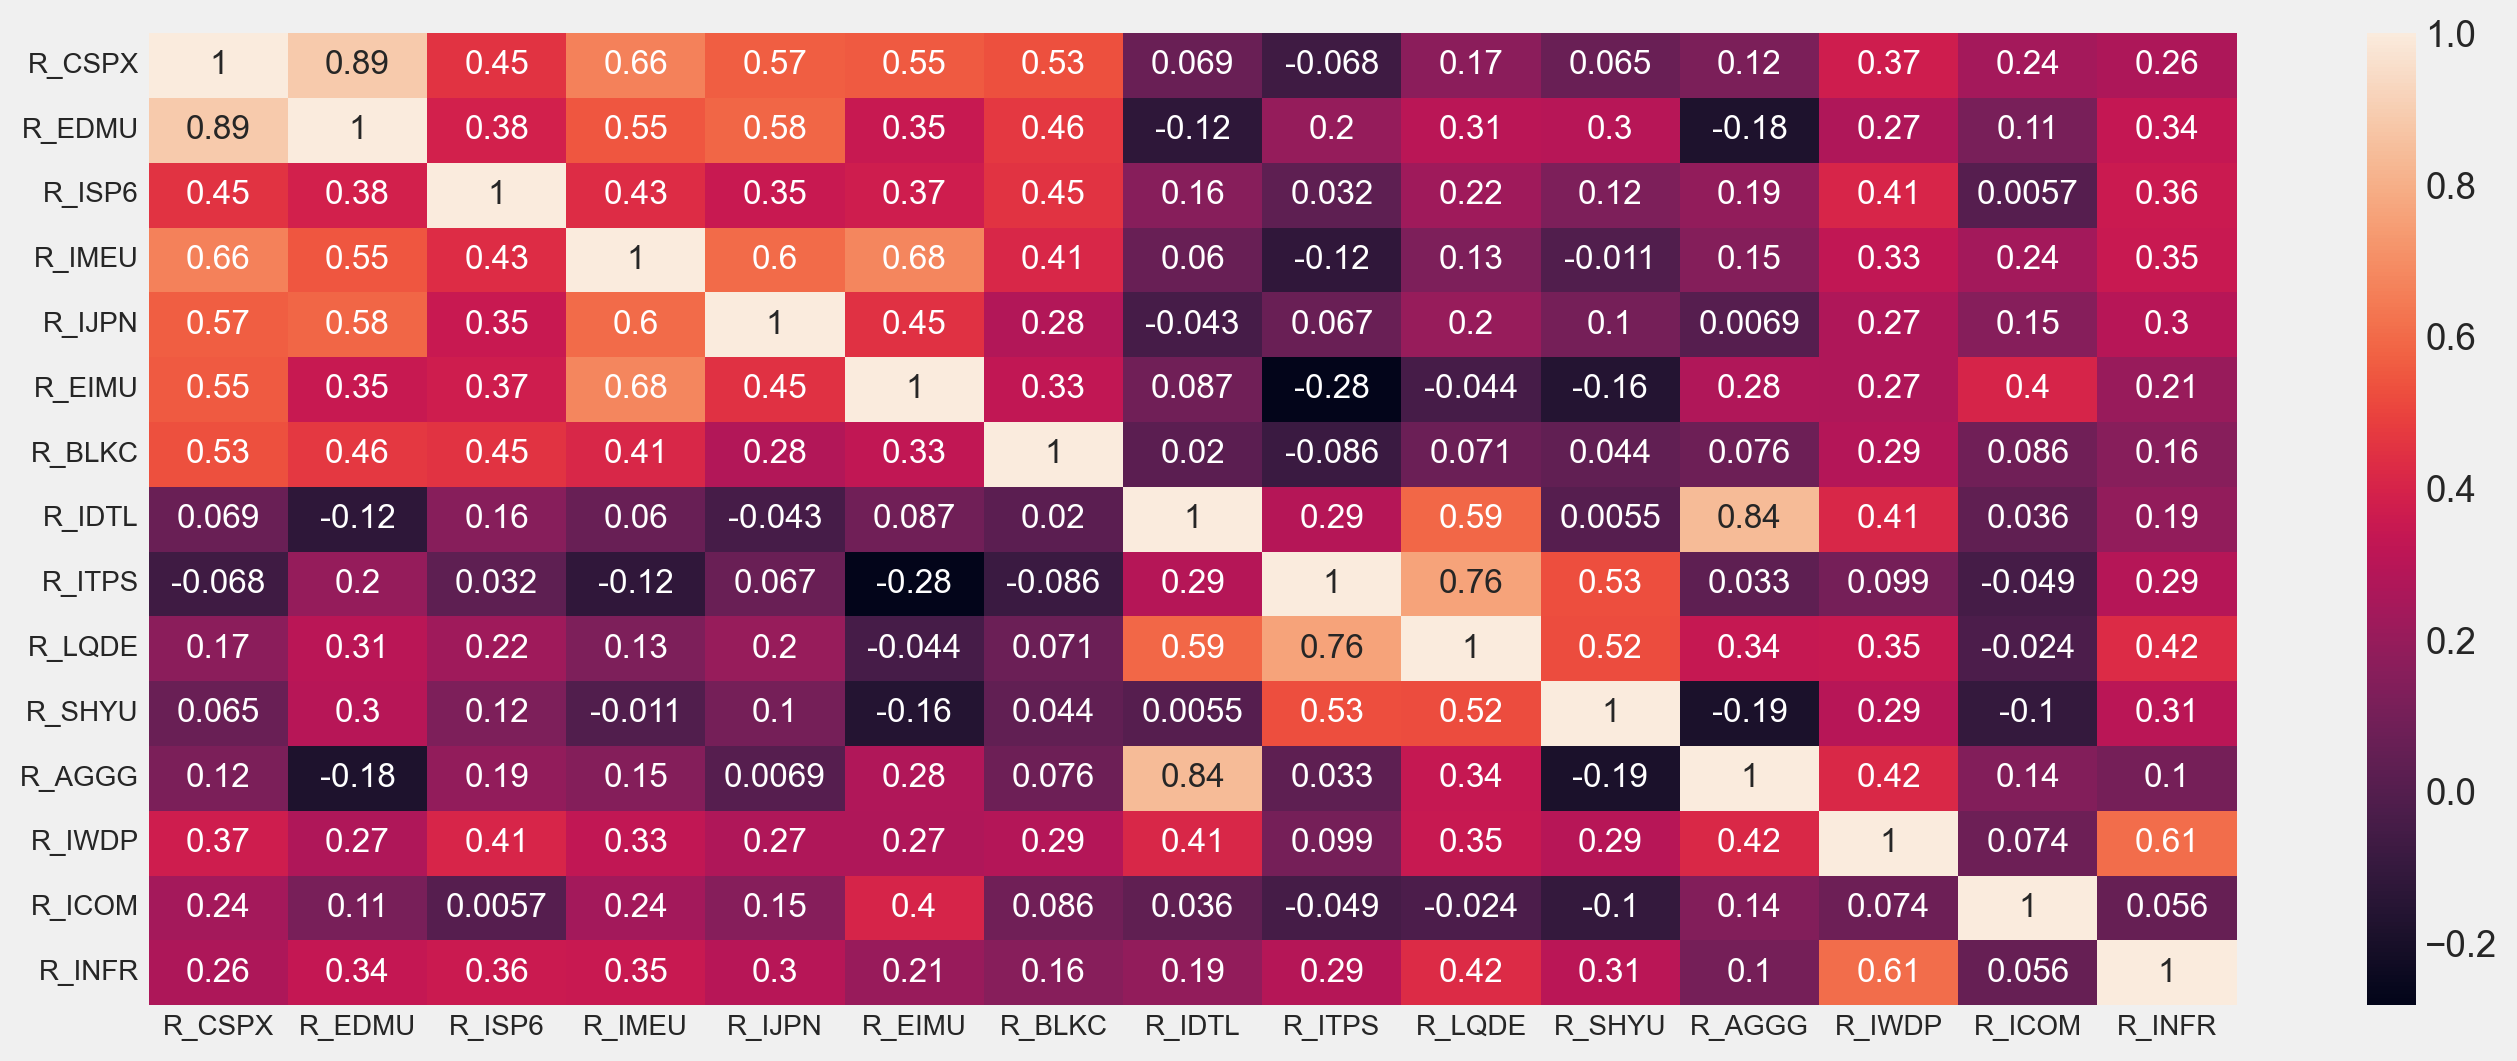

In [37]:
# Correlation coefficients between companies' returns
corr = dataset[dataset.columns[15:]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(15,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [38]:
returns = dataset[dataset.columns[15:]]
n_days = 252
for col in returns.columns:
    print("The volatility of the asset of", col, "=", round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the asset of R_CSPX = 11.94 % per year
The volatility of the asset of R_EDMU = 12.94 % per year
The volatility of the asset of R_ISP6 = 21.14 % per year
The volatility of the asset of R_IMEU = 10.74 % per year
The volatility of the asset of R_IJPN = 17.73 % per year
The volatility of the asset of R_EIMU = 14.86 % per year
The volatility of the asset of R_BLKC = 68.38 % per year
The volatility of the asset of R_IDTL = 14.3 % per year
The volatility of the asset of R_ITPS = 5.98 % per year
The volatility of the asset of R_LQDE = 6.54 % per year
The volatility of the asset of R_SHYU = 5.59 % per year
The volatility of the asset of R_AGGG = 6.26 % per year
The volatility of the asset of R_IWDP = 12.11 % per year
The volatility of the asset of R_ICOM = 11.51 % per year
The volatility of the asset of R_INFR = 10.24 % per year


In [39]:
returns = dataset[dataset.columns[15:]]
n_days = 21
for col in returns.columns:
    print("The volatility of the asset of", col, "=", round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the asset of R_CSPX = 3.45 % per month
The volatility of the asset of R_EDMU = 3.73 % per month
The volatility of the asset of R_ISP6 = 6.1 % per month
The volatility of the asset of R_IMEU = 3.1 % per month
The volatility of the asset of R_IJPN = 5.12 % per month
The volatility of the asset of R_EIMU = 4.29 % per month
The volatility of the asset of R_BLKC = 19.74 % per month
The volatility of the asset of R_IDTL = 4.13 % per month
The volatility of the asset of R_ITPS = 1.73 % per month
The volatility of the asset of R_LQDE = 1.89 % per month
The volatility of the asset of R_SHYU = 1.61 % per month
The volatility of the asset of R_AGGG = 1.81 % per month
The volatility of the asset of R_IWDP = 3.5 % per month
The volatility of the asset of R_ICOM = 3.32 % per month
The volatility of the asset of R_INFR = 2.96 % per month


In [40]:
n_days = 252
def sharpe_ratio(serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp - rf ) / volatility
    return sharpe

In [41]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of", col, "=", round(sharpe_ratio(returns[col]),2))

The Sharpe ratio of R_CSPX = 1.86
The Sharpe ratio of R_EDMU = 2.05
The Sharpe ratio of R_ISP6 = 0.33
The Sharpe ratio of R_IMEU = 0.59
The Sharpe ratio of R_IJPN = 0.7
The Sharpe ratio of R_EIMU = 0.45
The Sharpe ratio of R_BLKC = 0.56
The Sharpe ratio of R_IDTL = -0.62
The Sharpe ratio of R_ITPS = 0.89
The Sharpe ratio of R_LQDE = 0.75
The Sharpe ratio of R_SHYU = 1.07
The Sharpe ratio of R_AGGG = -0.57
The Sharpe ratio of R_IWDP = -0.35
The Sharpe ratio of R_ICOM = 0.3
The Sharpe ratio of R_INFR = 1.13


In [42]:
cov_daily = returns.cov() # daily
cov_annualized = returns.cov() * 252 # annualized
cov_annualized

R_CSPX    R_EDMU    R_ISP6    R_IMEU    R_IJPN    R_EIMU    R_BLKC  \
R_CSPX  0.014249  0.013738  0.011363  0.008471  0.012033  0.009843  0.043301   
R_EDMU  0.013738  0.016739  0.010531  0.007582  0.013409  0.006672  0.041135   
R_ISP6  0.011363  0.010531  0.044705  0.009797  0.013177  0.011682  0.065408   
R_IMEU  0.008471  0.007582  0.009797  0.011527  0.011467  0.010796  0.030083   
R_IJPN  0.012033  0.013409  0.013177  0.011467  0.031419  0.011763  0.033971   
R_EIMU  0.009843  0.006672  0.011682  0.010796  0.011763  0.022078  0.033097   
R_BLKC  0.043301  0.041135  0.065408  0.030083  0.033971  0.033097  0.467533   
R_IDTL  0.001173 -0.002290  0.004796  0.000918 -0.001090  0.001849  0.001925   
R_ITPS -0.000489  0.001539  0.000405 -0.000767  0.000706 -0.002503 -0.003522   
R_LQDE  0.001296  0.002580  0.003109  0.000881  0.002317 -0.000429  0.003177   
R_SHYU  0.000432  0.002151  0.001477 -0.000068  0.000995 -0.001326  0.001668   
R_AGGG  0.000902 -0.001466  0.002463  0.000993  0.000077  0.002578  0.003251   
R_IWDP  0.005354  0.004225  0.010441  0.004257  0.005815  0.004899  0.023657   
R_ICOM  0.003307  0.001670  0.000139  0.002941  0.003084  0.006852  0.006809   
R_INFR  0.003233  0.004475  0.007710  0.003884  0.005356  0.003148  0.011095   

          R_IDTL    R_ITPS    R_LQDE    R_SHYU    R_AGGG    R_IWDP    R_ICOM  \
R_CSPX  0.001173 -0.000489  0.001296  0.000432  0.000902  0.005354  0.003307   
R_EDMU -0.002290  0.001539  0.002580  0.002151 -0.001466  0.004225  0.001670   
R_ISP6  0.004796  0.000405  0.003109  0.001477  0.002463  0.010441  0.000139   
R_IMEU  0.000918 -0.000767  0.000881 -0.000068  0.000993  0.004257  0.002941   
R_IJPN -0.001090  0.000706  0.002317  0.000995  0.000077  0.005815  0.003084   
R_EIMU  0.001849 -0.002503 -0.000429 -0.001326  0.002578  0.004899  0.006852   
R_BLKC  0.001925 -0.003522  0.003177  0.001668  0.003251  0.023657  0.006809   
R_IDTL  0.020461  0.002503  0.005555  0.000044  0.007499  0.007143  0.000600   
R_ITPS  0.002503  0.003577  0.002988  0.001756  0.000123  0.000719 -0.000336   
R_LQDE  0.005555  0.002988  0.004273  0.001913  0.001405  0.002754 -0.000178   
R_SHYU  0.000044  0.001756  0.001913  0.003127 -0.000669  0.001992 -0.000667   
R_AGGG  0.007499  0.000123  0.001405 -0.000669  0.003919  0.003170  0.001031   
R_IWDP  0.007143  0.000719  0.002754  0.001992  0.003170  0.014669  0.001037   
R_ICOM  0.000600 -0.000336 -0.000178 -0.000667  0.001031  0.001037  0.013256   
R_INFR  0.002747  0.001801  0.002845  0.001768  0.000652  0.007533  0.000665   

          R_INFR  
R_CSPX  0.003233  
R_EDMU  0.004475  
R_ISP6  0.007710  
R_IMEU  0.003884  
R_IJPN  0.005356  
R_EIMU  0.003148  
R_BLKC  0.011095  
R_IDTL  0.002747  
R_ITPS  0.001801  
R_LQDE  0.002845  
R_SHYU  0.001768  
R_AGGG  0.000652  
R_IWDP  0.007533  
R_ICOM  0.000665  
R_INFR  0.010488

In [43]:
# check cov of each element
cov_annualized['R_EDMU']['R_CSPX']

np.float64(0.0137384509066082)

In [44]:
# let assume the market index is R_CSPX, the Beta for these assets are as follows
# NOTE: ideally, we should use 5 or 10 years as a period, in our current case, we only have 1 year data since BLKC only has one year data
for col in returns.columns:
    print("The Beta (1 year period, ideally we need 5 or 10 years) of", 
          col, "=", round(cov_daily[col]['R_CSPX']/cov_daily['R_CSPX']['R_CSPX'], 2))

The Beta (1 year period, ideally we need 5 or 10 years) of R_CSPX = 1.0
The Beta (1 year period, ideally we need 5 or 10 years) of R_EDMU = 0.96
The Beta (1 year period, ideally we need 5 or 10 years) of R_ISP6 = 0.8
The Beta (1 year period, ideally we need 5 or 10 years) of R_IMEU = 0.59
The Beta (1 year period, ideally we need 5 or 10 years) of R_IJPN = 0.84
The Beta (1 year period, ideally we need 5 or 10 years) of R_EIMU = 0.69
The Beta (1 year period, ideally we need 5 or 10 years) of R_BLKC = 3.04
The Beta (1 year period, ideally we need 5 or 10 years) of R_IDTL = 0.08
The Beta (1 year period, ideally we need 5 or 10 years) of R_ITPS = -0.03
The Beta (1 year period, ideally we need 5 or 10 years) of R_LQDE = 0.09
The Beta (1 year period, ideally we need 5 or 10 years) of R_SHYU = 0.03
The Beta (1 year period, ideally we need 5 or 10 years) of R_AGGG = 0.06
The Beta (1 year period, ideally we need 5 or 10 years) of R_IWDP = 0.38
The Beta (1 year period, ideally we need 5 or 10 yea

# Portfolio Optimization based on Efficient Frontier

In [45]:
from scipy.optimize import minimize

In [46]:
# Portfolio Simulation
# For reproducibility, we're going to fix set seed
# Reference: https://medium.com/@abhishekjainindore24/seeding-success-a-guide-to-setting-seeds-in-data-science-5d24e00c3dc7
# Reference: https://medium.com/data-science/random-seeds-and-reproducibility-933da79446e3
np.random.seed(2025)

portfolio = 2000 # generation of a portfolio
n_assets = returns.shape[1]
weights = np.random.dirichlet(np.full(n_assets, 0.05), portfolio)
mean_returns = returns.mean()
sigma = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol = np.zeros(portfolio)
sharpe_ratio = np.zeros(portfolio)
rf_rate = 0.025 # risk free rate
for i in range(portfolio):
    w = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i] = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i] = (expected_returns[i]-rf_rate)/expected_vol[i]

In [47]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T, np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p = portfolio_volatility(weight)
    return return_p, vol_p

In [48]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate = 0.025
    return -(return_p - rf_rate) / vol_p

def max_sharpe_ratio(): 
    def sum_one(weight):
        w = weight
        return np.sum(weight)-1
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist() # w0 is an initila guess

    return minimize(negativeSR, w0, method='SLSQP', bounds=((0,1),)*n_assets, constraints=weight_constraints)

In [49]:
def min_vol():
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility, w0, method='SLSQP', bounds=bounds, constraints=weight_constraints)

In [50]:
def efficient_portfolio_target(target):
    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)-target}, {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility, w0, method = 'SLSQP', bounds = bounds, constraints = constraints)

In [51]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

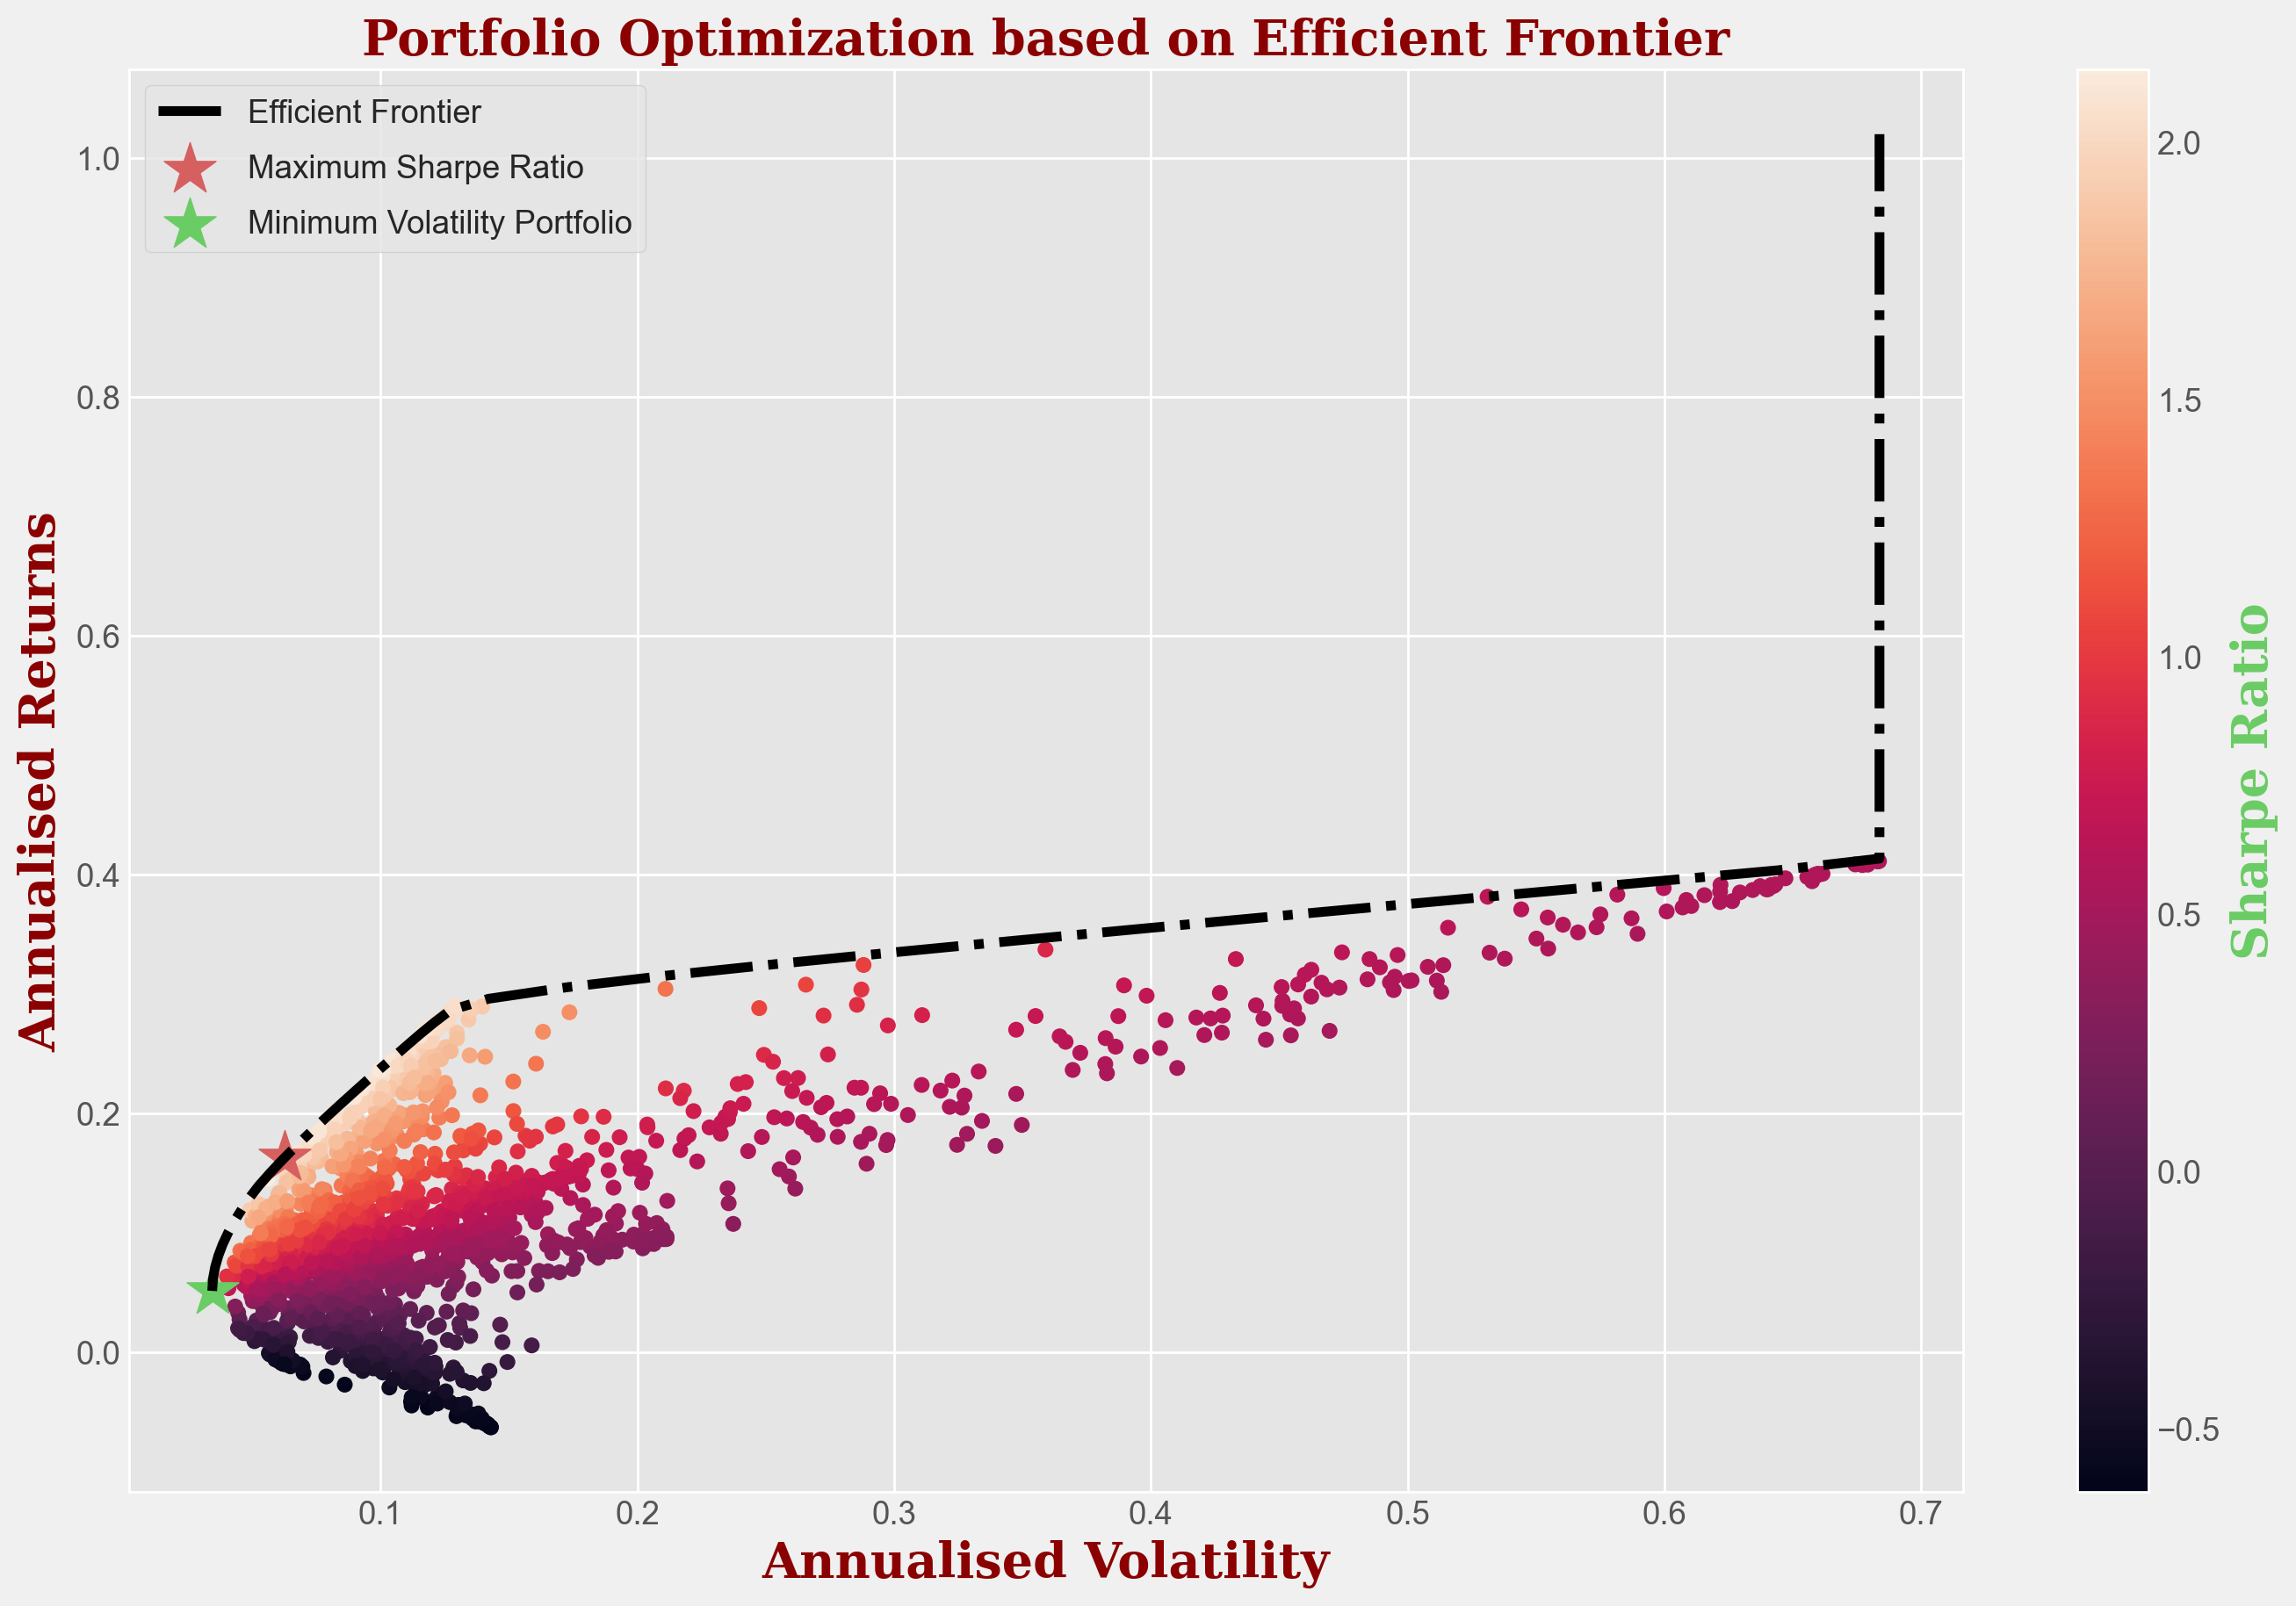

In [52]:
sharpe_maximum = max_sharpe_ratio()
return_p, vol_p = portfolio_performance(sharpe_maximum['x'])
min_volatility = min_vol()
return_min, vol_min = portfolio_performance(min_volatility['x'])

plt.figure(figsize = (15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol, expected_returns, c=sharpe_ratio)
plt.colorbar().set_label('Sharpe Ratio', size=20, color='g', family='serif', weight='bold')
target = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle='dashdot', color='black', label='Efficient Frontier')
plt.scatter(vol_p, return_p, c='r', marker='*', s=500, label='Maximum Sharpe Ratio')
plt.scatter(vol_min, return_min, c='g', marker='*', s=500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif', 'color':'darkred', 'size':20, 'weight':'bold'}
font2 = {'family':'serif', 'color':'darkred', 'size':20, 'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier', fontdict=font1)
plt.xlabel('Annualised Volatility', fontdict=font2)
plt.ylabel('Annualised Returns', fontdict=font2)
plt.legend(labelspacing=0.8)
plt.show()

### Let us look at the performance and risk of both portfolios (i.e. max Shape ratio and min Volatility on the plot above)

In [53]:
print('The performance of max Shape Ratio portfolio: ', round(return_p,4))

The performance of max Shape Ratio portfolio:  0.1628


In [54]:
print('The risk of max Shape Ratio portfolio: ', round(vol_p,4))

The risk of max Shape Ratio portfolio:  0.0626


In [55]:
rf_rate = 0.025
shape_p = (return_p - rf_rate) / vol_p
print('The Shape Ratio (assuming risk free ratio is 0.025) of max Shape Ratio portfolio: ', round(shape_p,4))

The Shape Ratio (assuming risk free ratio is 0.025) of max Shape Ratio portfolio:  2.1993


In [56]:
print('The performance of min Volatility portfolio: ', round(return_min,4))

The performance of min Volatility portfolio:  0.0511


In [57]:
print('The risk of min Volatility portfolio: ', round(vol_min,4))

The risk of min Volatility portfolio:  0.0344


In [59]:
rf_rate = 0.025
shape_min = (return_min - rf_rate) / vol_min
print('The Shape Ratio (assuming risk free ratio is 0.025) of min Volatility portfolio: ', round(shape_min,4))

The Shape Ratio (assuming risk free ratio is 0.025) of min Volatility portfolio:  0.7578


### Now, let us look at the weight of each asset in both portfolios

In [60]:
# The weights for Max Shape Ratio portfolio
max_sharpe_weight = sharpe_maximum['x']
max_sharpe_weight_df = pd.DataFrame(max_sharpe_weight, index=returns.columns)
max_sharpe_weight_df = max_sharpe_weight_df.rename(columns={0: "Weight_Max_SharpeRatio"})
max_sharpe_weight_df

Weight_Max_SharpeRatio
R_CSPX            3.077715e-01
R_EDMU            1.224069e-01
R_ISP6            0.000000e+00
R_IMEU            0.000000e+00
R_IJPN            0.000000e+00
R_EIMU            0.000000e+00
R_BLKC            0.000000e+00
R_IDTL            0.000000e+00
R_ITPS            2.625398e-01
R_LQDE            3.930639e-16
R_SHYU            2.221603e-01
R_AGGG            1.682179e-15
R_IWDP            0.000000e+00
R_ICOM            6.702538e-16
R_INFR            8.512152e-02

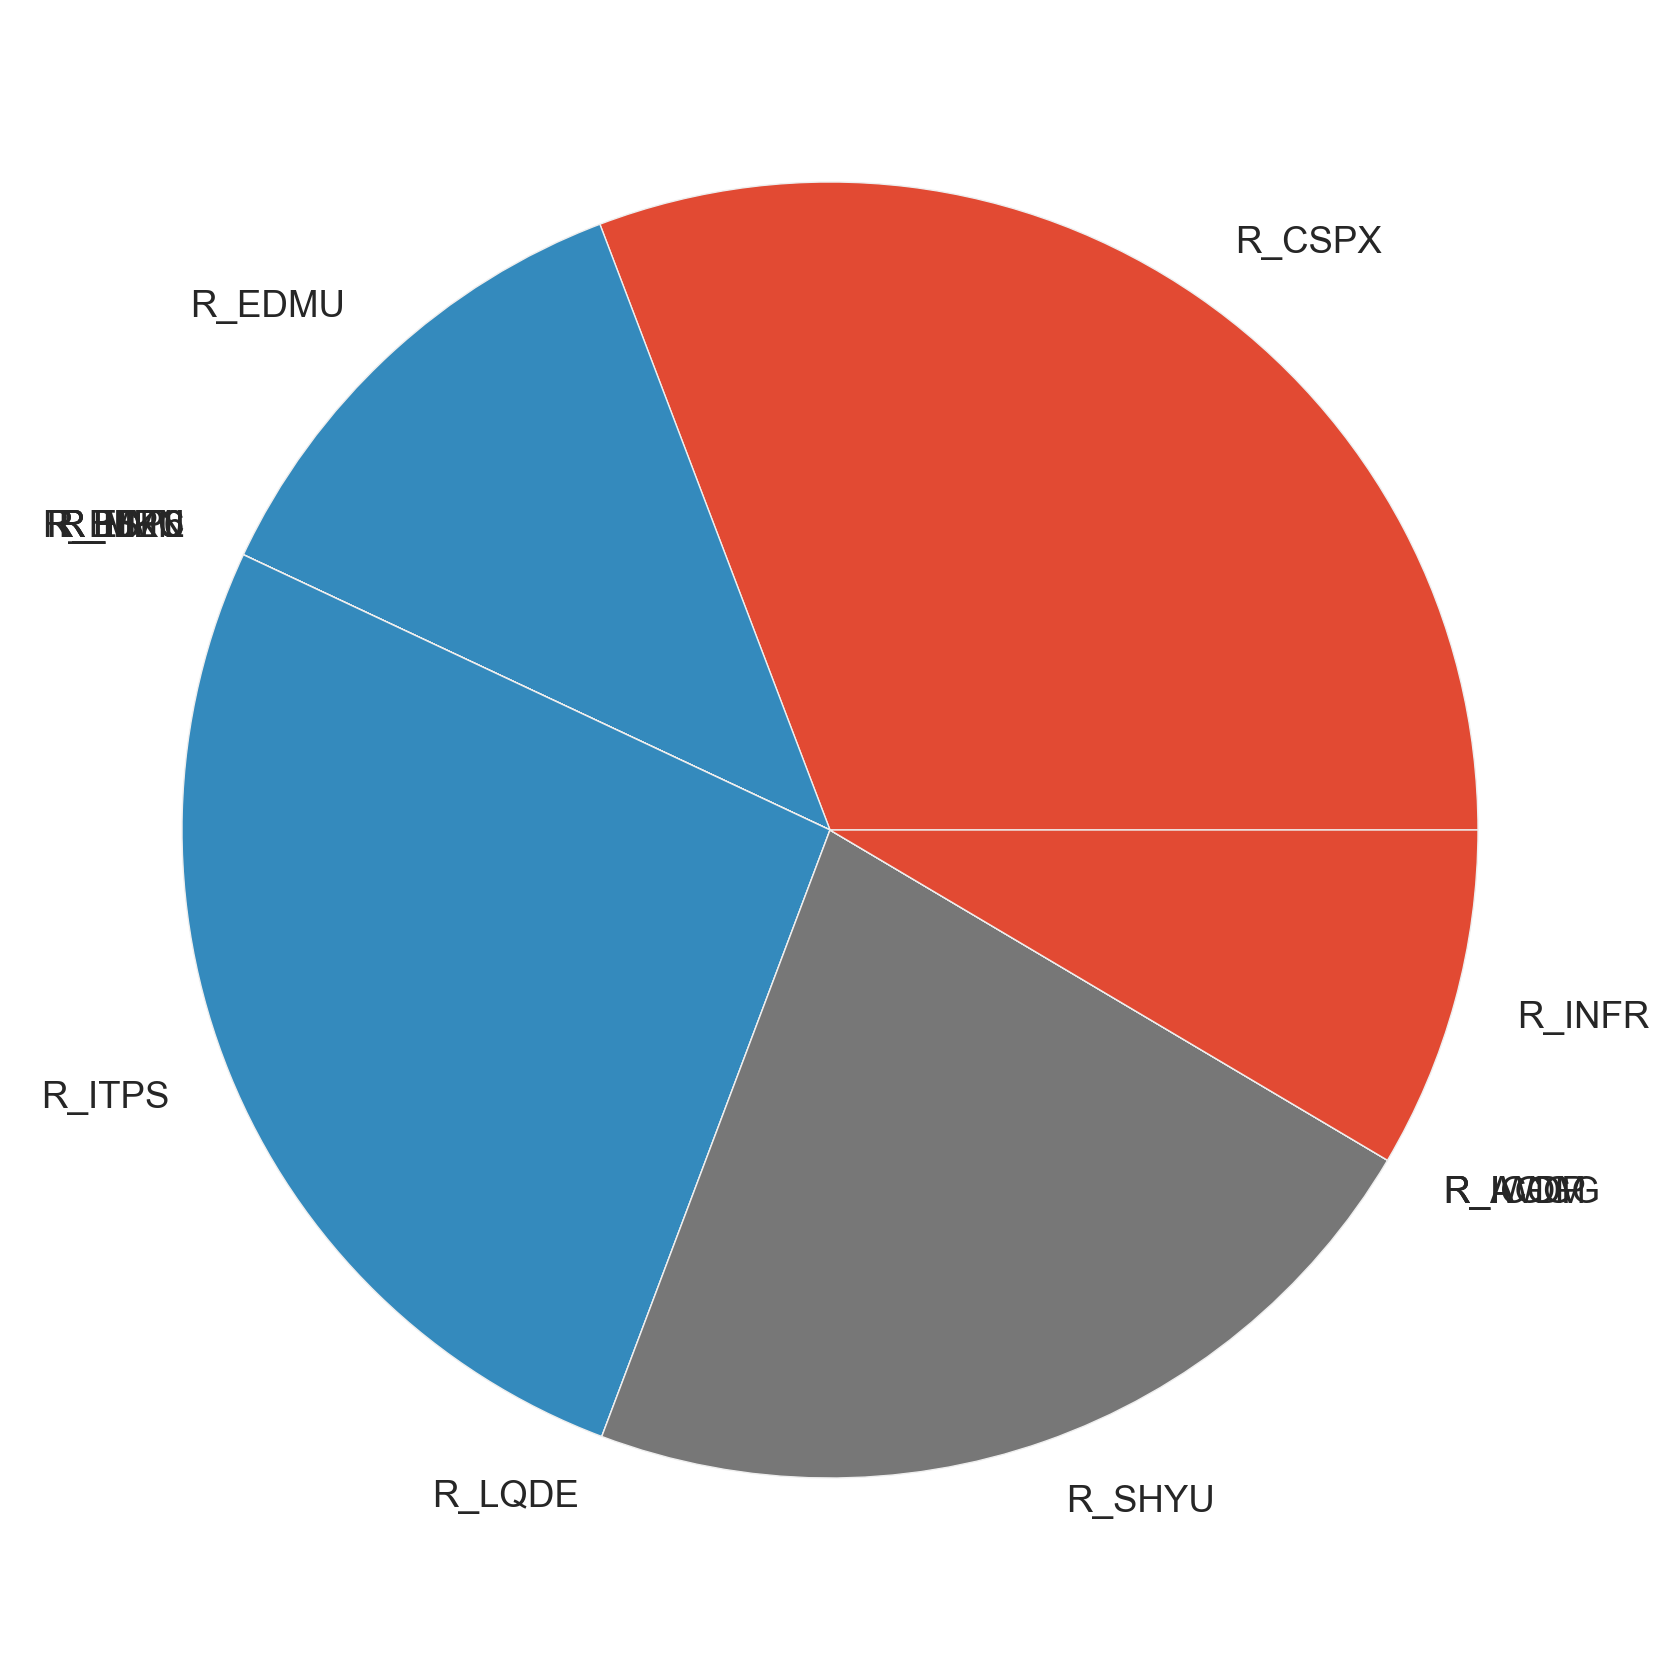

In [61]:
plt.pie(max_sharpe_weight_df['Weight_Max_SharpeRatio'], labels = returns.columns)
plt.show() 

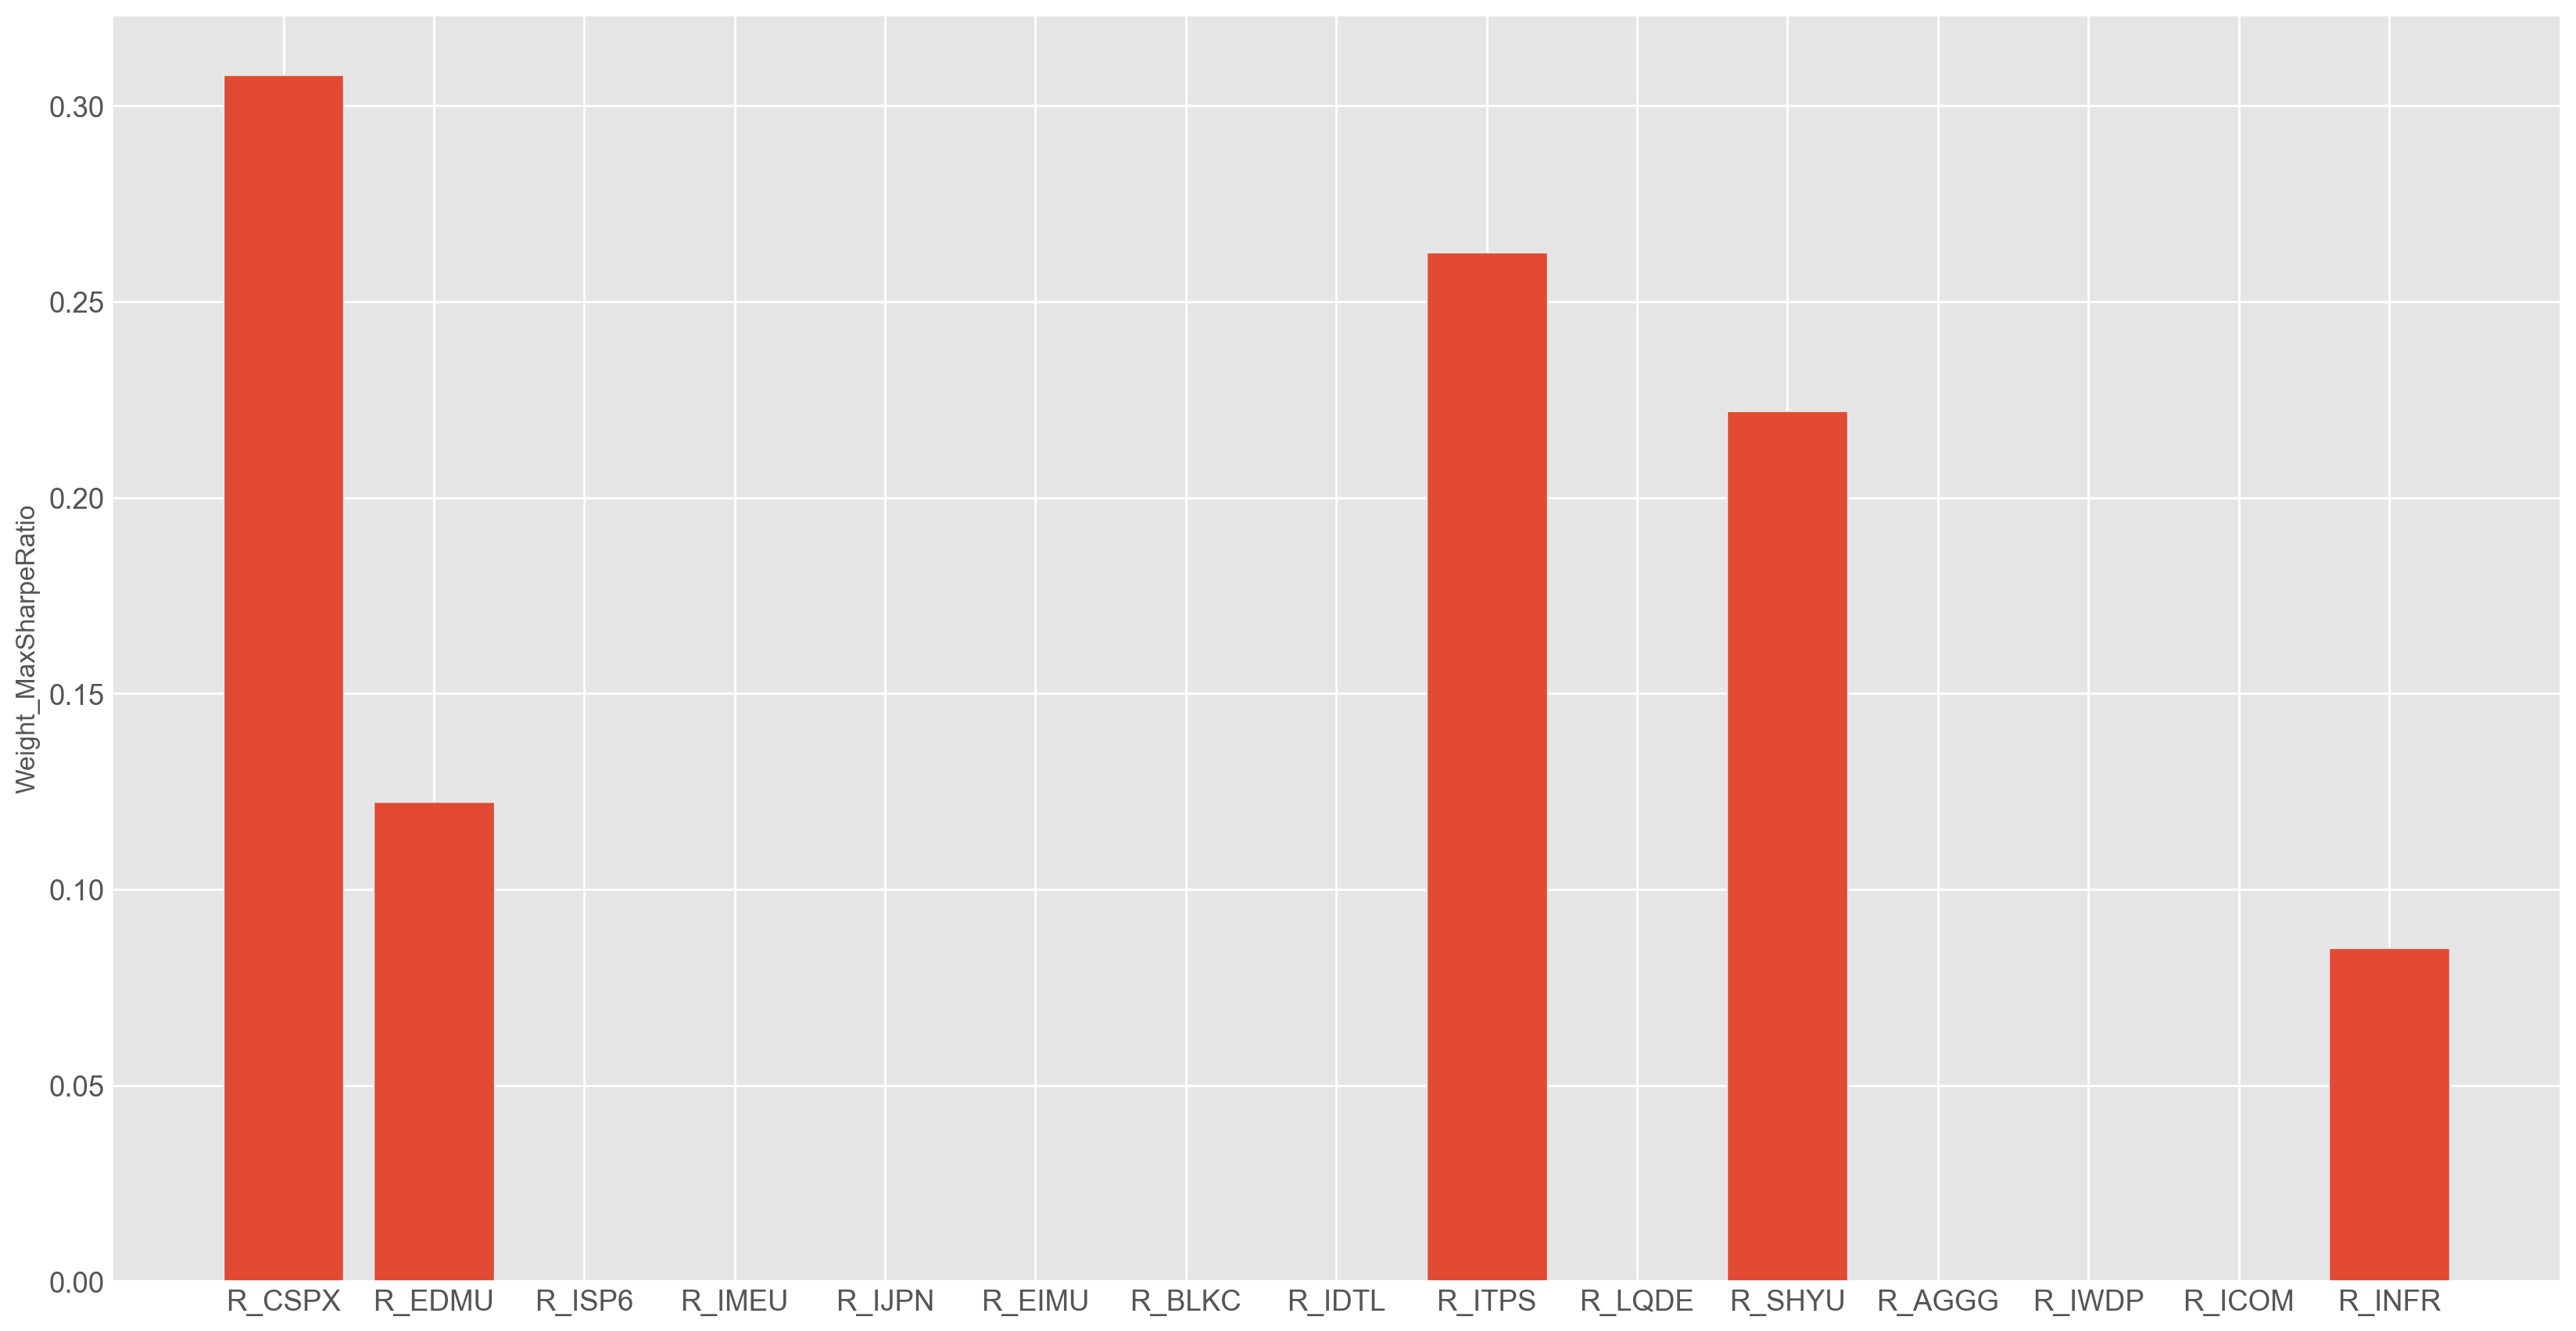

In [62]:
fig, ax = plt.subplots()
ax.bar(returns.columns, max_sharpe_weight_df['Weight_Max_SharpeRatio'])
ax.set_ylabel('Weight_MaxSharpeRatio')
plt.show()

In [63]:
# The weights for Min Volatility portfolio
min_vol_weight = min_volatility['x']
min_vol_weight_df = pd.DataFrame(min_vol_weight, index=returns.columns)

min_vol_weight_df = min_vol_weight_df.rename(columns={0: "Weight_Min_Volatility"})
min_vol_weight_df

#min_vol_weight_df.sum()

Weight_Min_Volatility
R_CSPX           0.000000e+00
R_EDMU           8.277646e-18
R_ISP6           2.112594e-17
R_IMEU           6.818239e-02
R_IJPN           1.718959e-17
R_EIMU           3.857124e-05
R_BLKC           4.552472e-19
R_IDTL           0.000000e+00
R_ITPS           1.562081e-01
R_LQDE           0.000000e+00
R_SHYU           3.781109e-01
R_AGGG           3.264088e-01
R_IWDP           8.580745e-19
R_ICOM           7.105115e-02
R_INFR           0.000000e+00

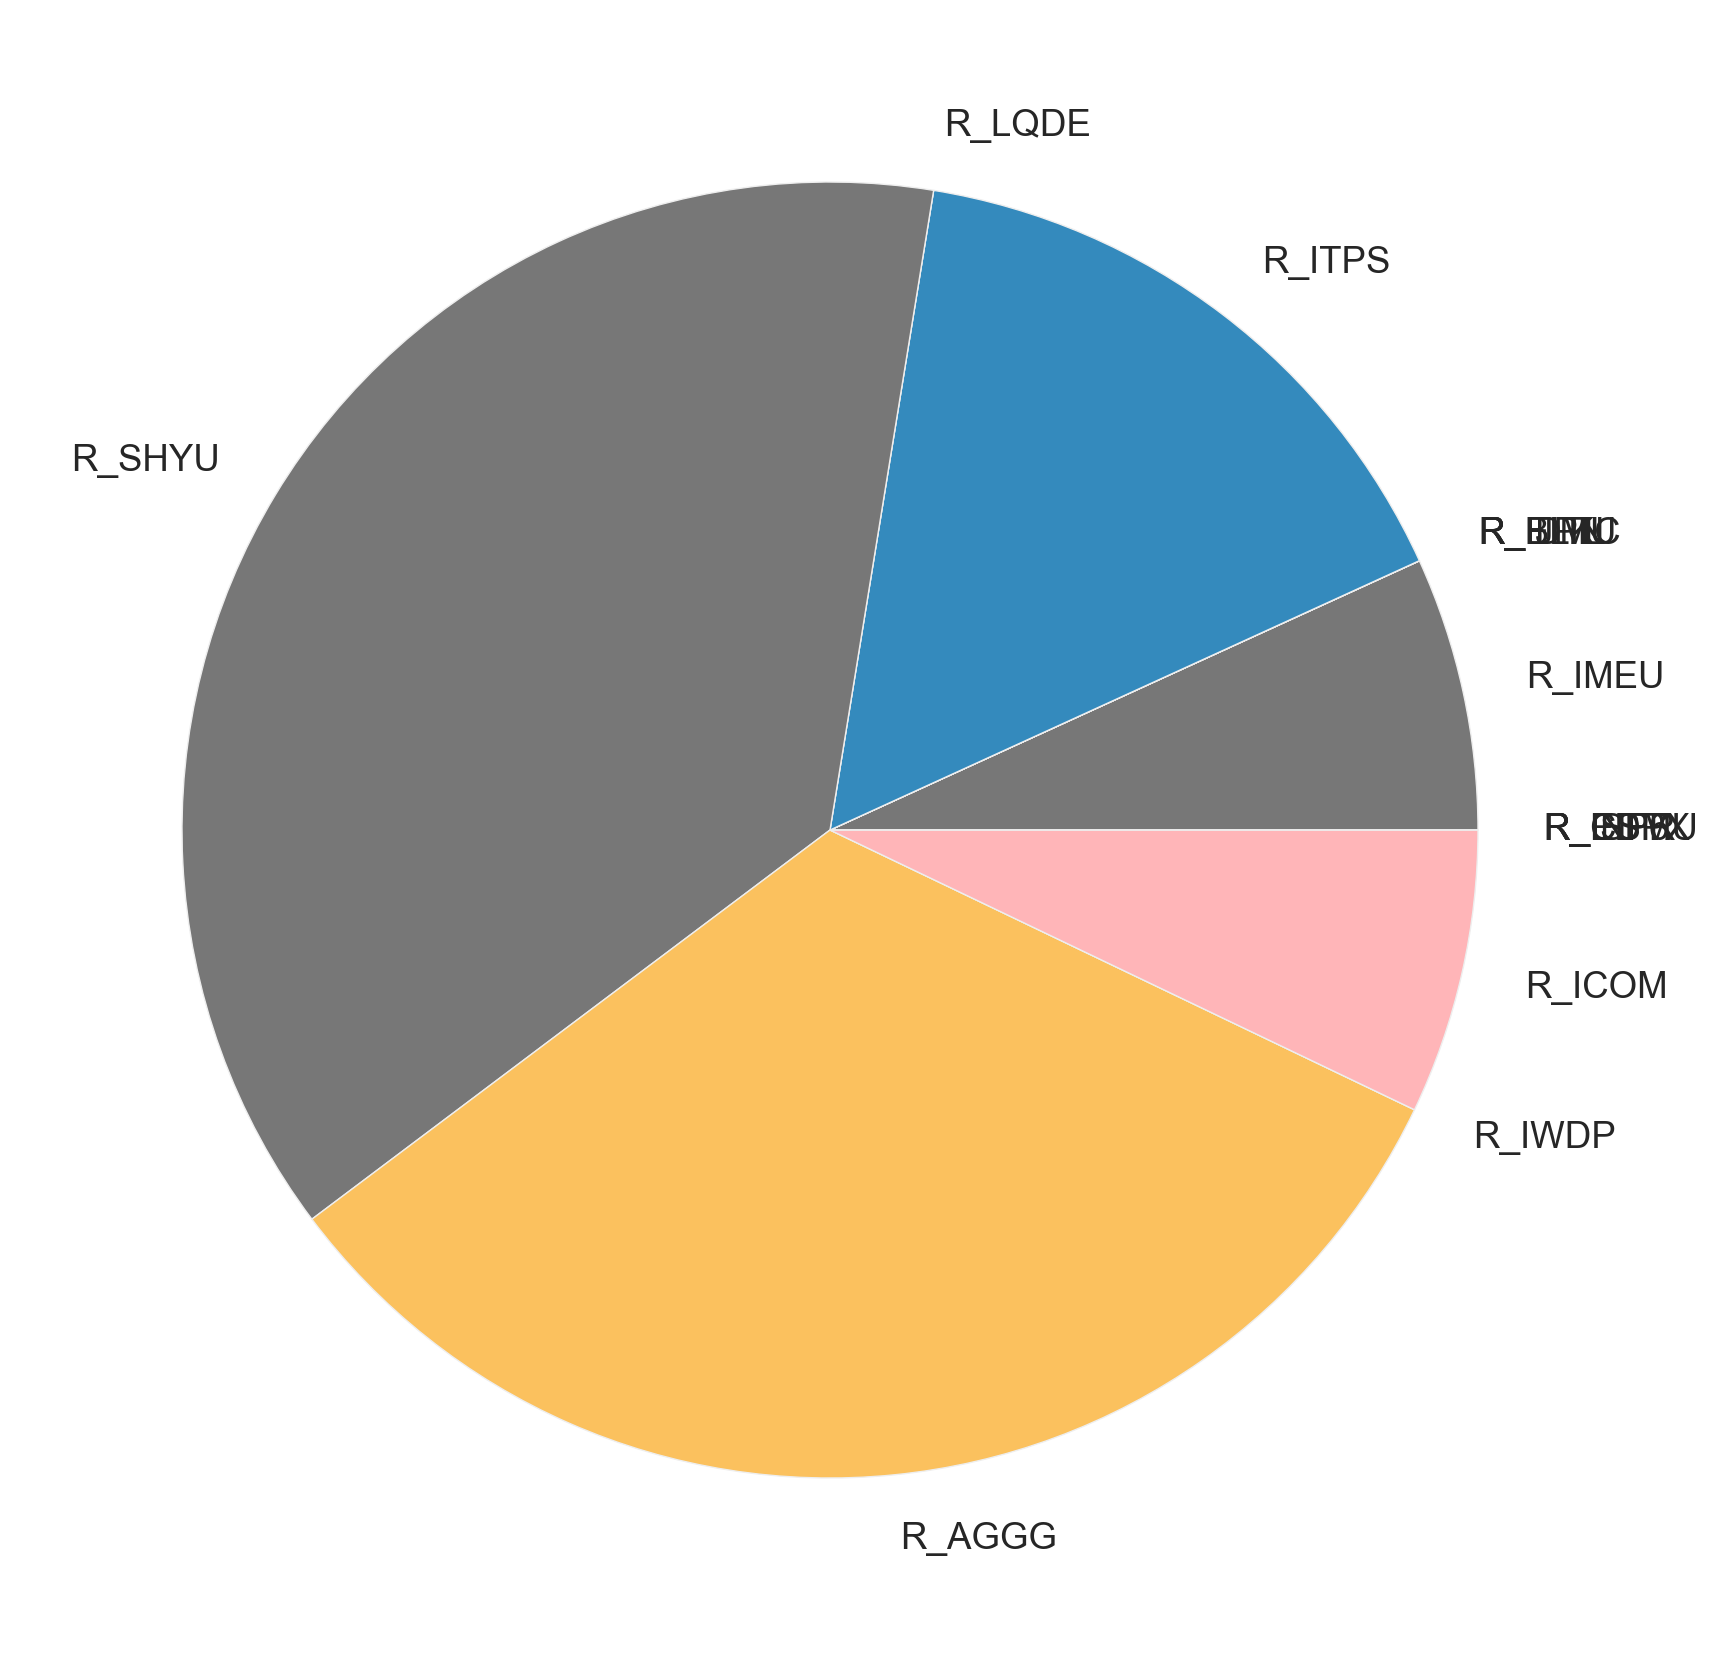

In [64]:
plt.pie(min_vol_weight_df['Weight_Min_Volatility'], labels = returns.columns)
plt.show() 

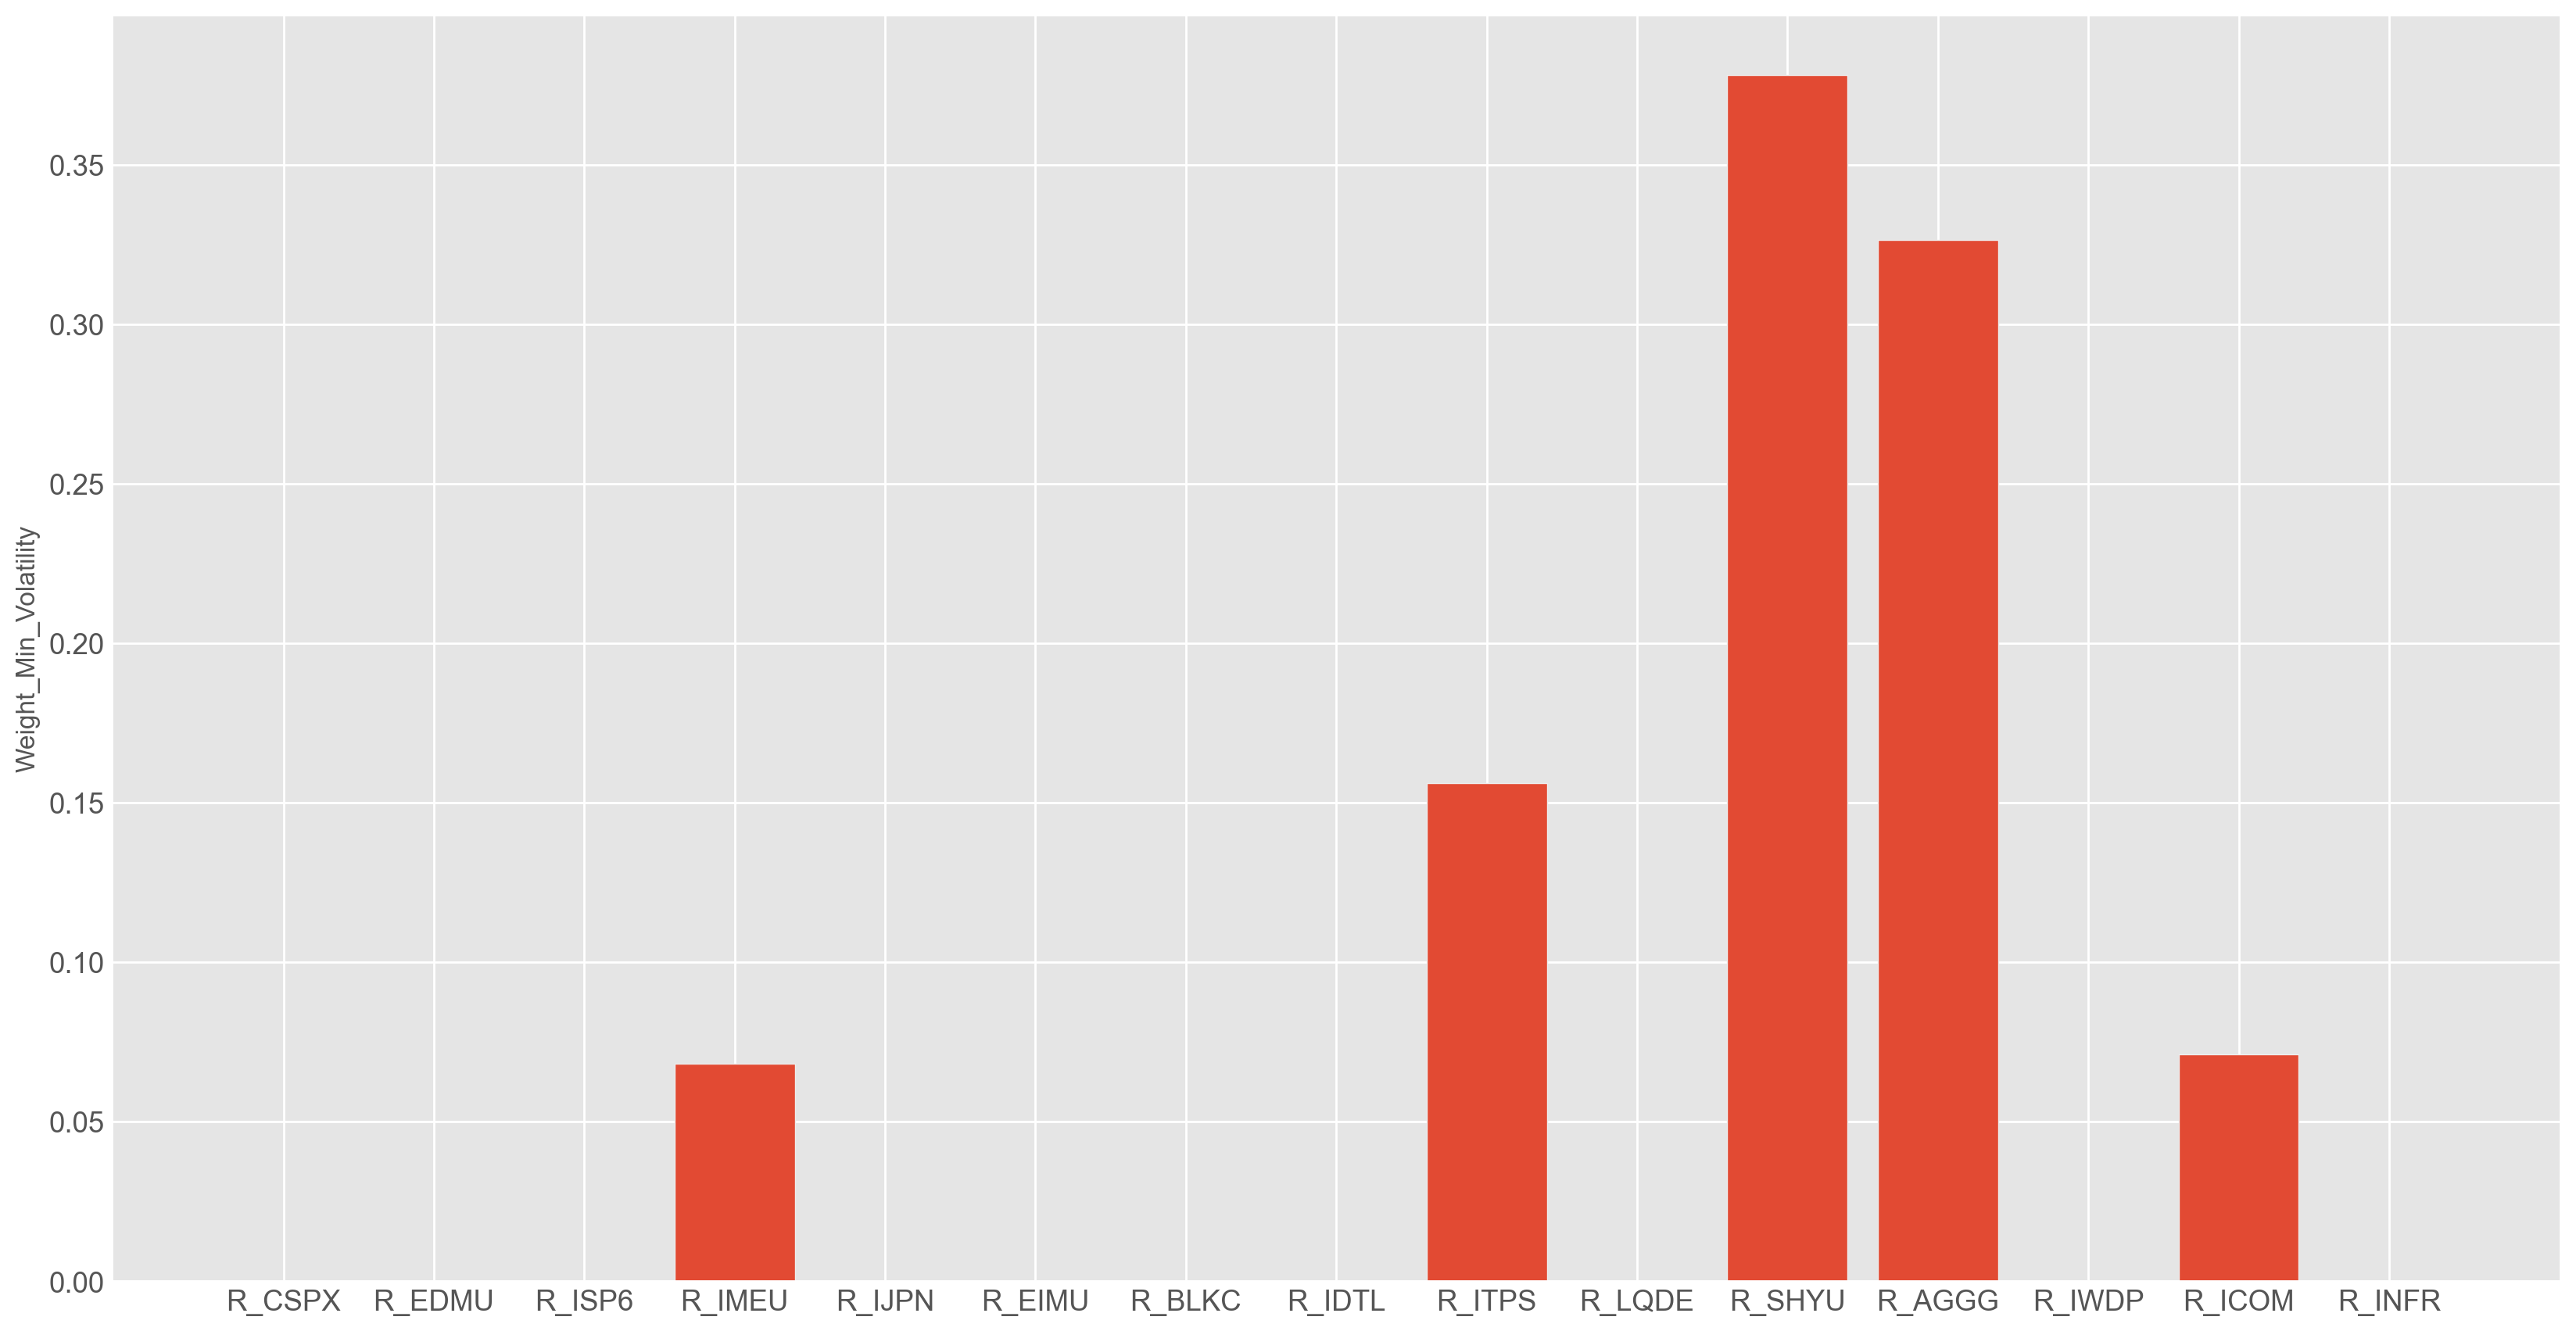

In [65]:
fig, ax = plt.subplots()
ax.bar(returns.columns, min_vol_weight_df['Weight_Min_Volatility'])
ax.set_ylabel('Weight_Min_Volatility')
plt.show()

# The tangency portfolio

It is worth mentioning that so far we have decided to invest all of our capital and, at the same time, our strategy has been long-only. That is, the weights that we allocate to the assets sum to 1 and all of them are positive (because we buy the assets). In particular, these two conditions were imposed when solving the minimization problems. However, we could in principle not invest all of our capital, which means that we do not necessarily get weights that sum to 1, and also we may decide to not buy all the assets. We could short selling some of them (by short shelling we mean selling an asset that we do not have and that we borrow from someone else).

To keep things simple, let us focus on maximizing the sharpe ratio portfolio in presence of non null risk-free rate. Recall that a risk-free asset is an (hypothetical) asset with a risk-free rate. For example, short-term government securities (such as US treasury bills) are used as a risk-free asset since they pay a fixed interest rate and have exceptionally low default risk.

The risk-free asset has zero volatility. Furthermore, it is also uncorrelated with any other asset since, by definition, its volatility is zero. Therefore, when combined with any other asset in a portfolio, the change in return is linearly related to the change in risk as the proportions in the combination vary.

## The capital market line (CML)

When a risk-free asset is introduced, there will be a line satisfying:

 1. it is tangent to the curve at the risky portfolio with the highest Sharpe ratio; 
 2. its vertical intercept represents a portfolio with $100\%$ of holdings in the risk-free asset; 
 3. the tangency with the curve represents the highest sharpe ratio portfolio with no risk-free holdings and $100%$ of risky assets; 
 4. assets held in the portfolio occurring at the tangency point; 
 5. points on this line represent portfolios containing positive amounts of both the risky assets and the risk-free asset; 
 
This efficient line is called the **Capital Market Line (CML)**, and its given by:
$$
R_{CML} = R_{f} + \sigma_{CML}\frac{R_{p} - R_{f}}{\sigma_{p}}, 
$$
where $R_p$ and $\sigma_p$ are the return and the volatility of the risky portfolio with no risk free asset, respectively, 
$R_f$ denotes the risk-free rate, and $R_{CML}$ and $\sigma_{CML}$ denote the return and the volatility of the 
portfolio combining both risky assets and the risk-free asset, respectively.

The introduction of the risk-free asset as a possible component of the portfolio has improved the range of volatility-return combinations available since **everywhere, except at the tangency portfolio, the CML provides a higher return than the (old) efficient frontier does 
at every possible volatility.** 

In [139]:
# Save the python script edhec_risk_kit.py in the same folder of this notebook
import edhec_risk_kit as erk

In [140]:
expected_vol

array([0.12887133, 0.10549283, 0.20033608, ..., 0.56050116, 0.08329629,
       0.12140553], shape=(2000,))

In [141]:
expected_returns

array([0.15536658, 0.09540677, 0.09656734, ..., 0.35780214, 0.08707601,
       0.24402748], shape=(2000,))

In [142]:
sharpe_ratio

array([1.01160263, 0.6674081 , 0.35723642, ..., 0.59375816, 0.74524333,
       1.80409796], shape=(2000,))

In [143]:
portfolios = pd.DataFrame({'volatility': expected_vol, 'return': expected_returns, 'sharpe ratio': sharpe_ratio}, 
                           columns=['return', 'volatility', 'sharpe ratio'])
portfolios

#portfolios.to_csv('portfolios_check.csv', index=False) 

return  volatility  sharpe ratio
0     0.155367    0.128871      1.011603
1     0.095407    0.105493      0.667408
2     0.096567    0.200336      0.357236
3     0.095958    0.146496      0.484370
4     0.076831    0.068345      0.758372
...        ...         ...           ...
1995  0.229728    0.113142      1.809480
1996  0.181852    0.270197      0.580510
1997  0.357802    0.560501      0.593758
1998  0.087076    0.083296      0.745243
1999  0.244027    0.121406      1.804098

[2000 rows x 3 columns]

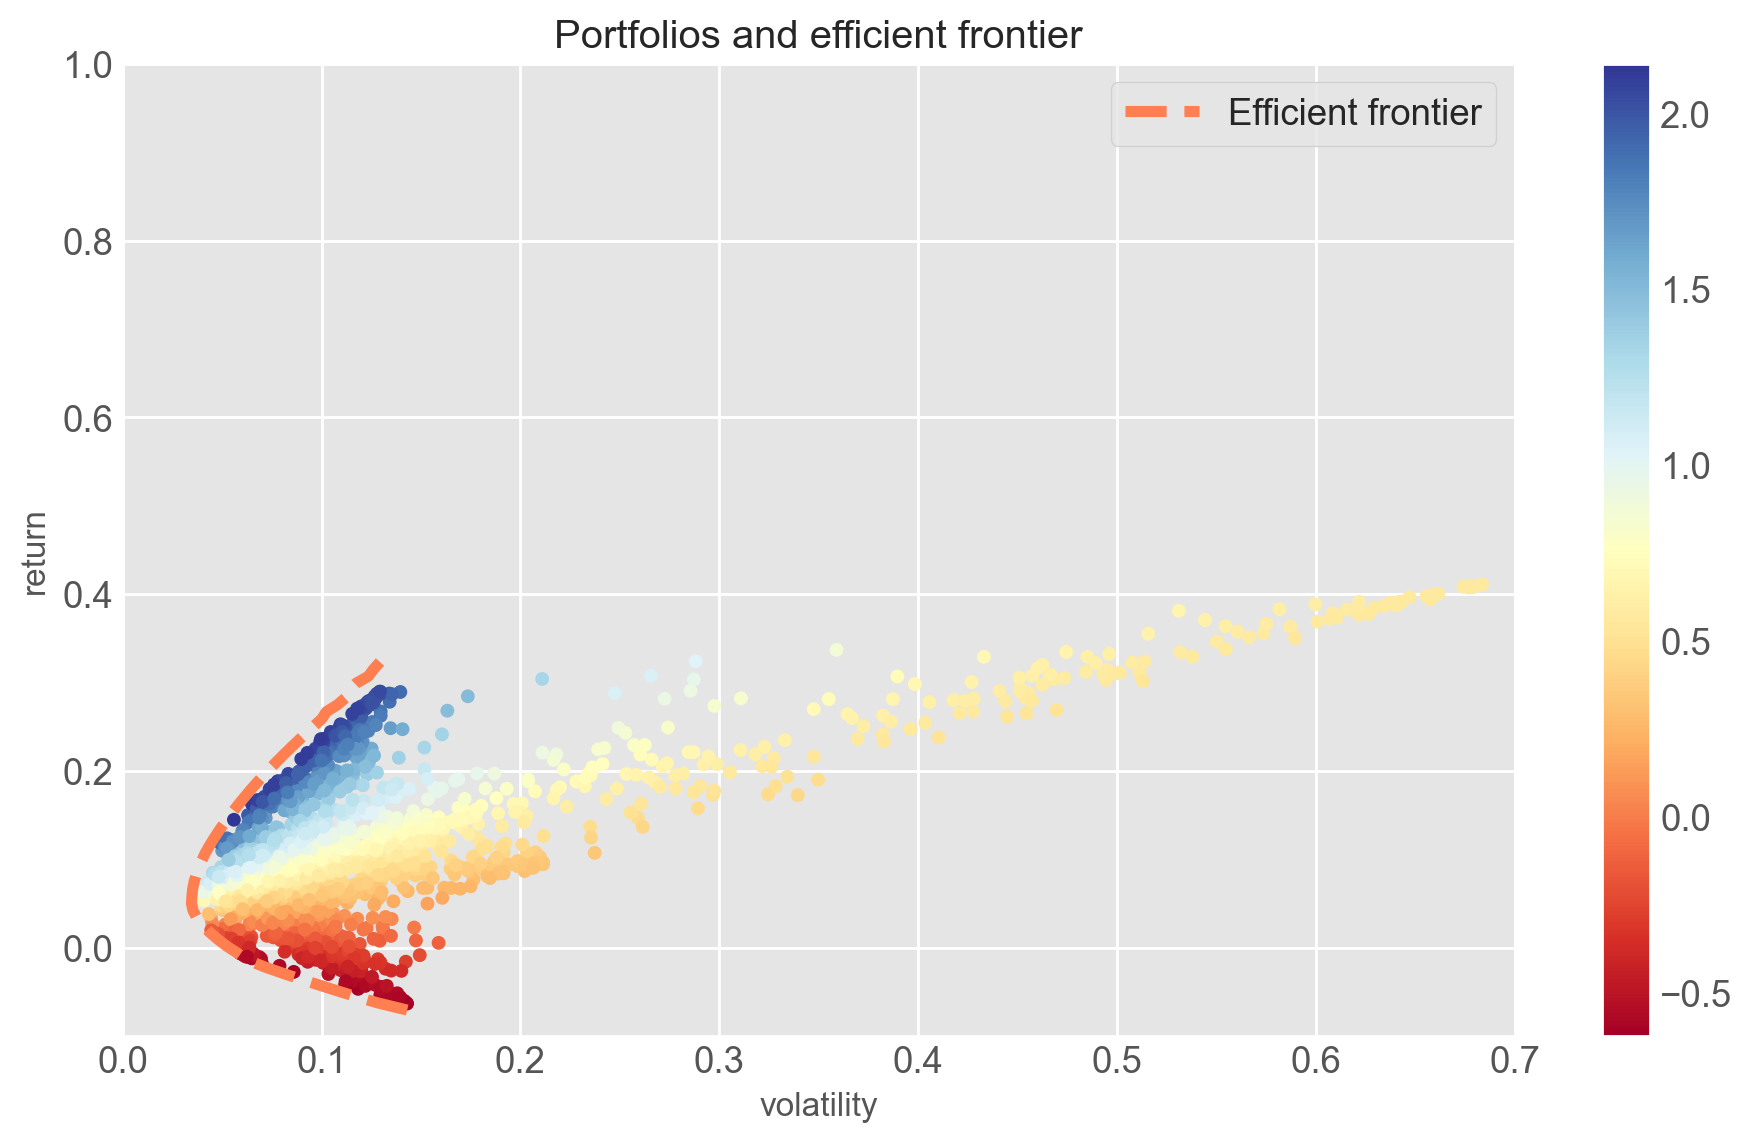

In [144]:
periods_per_year = 252

fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# Draw the efficient frontier
df = erk.efficient_frontier(50, returns, cov_daily, periods_per_year, risk_free_rate=0.025)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.set_xlim([0,0.7])
ax.set_ylim([-0.1,1])

fig.colorbar(im, ax=ax)
plt.show()

In [145]:
# find the portfolio with lowest volatility 
low_vol_portfolio = portfolios.iloc[ portfolios['volatility'].idxmin() ]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# find the portfolio with highest sharpe ratio
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print("Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 6.32%
- volatility  : 4.01%
- sharpe ratio: 0.95
Maximum Sharpe Ratio portfolio:
- return      : 14.47%
- volatility  : 5.59%
- sharpe ratio: 2.14


In [146]:
low_vol_portfolio

return          0.063207
volatility      0.040143
sharpe ratio    0.951765
Name: 1228, dtype: float64

In [147]:
high_sharpe_portfolio

return          0.144727
volatility      0.055924
sharpe ratio    2.140888
Name: 1016, dtype: float64

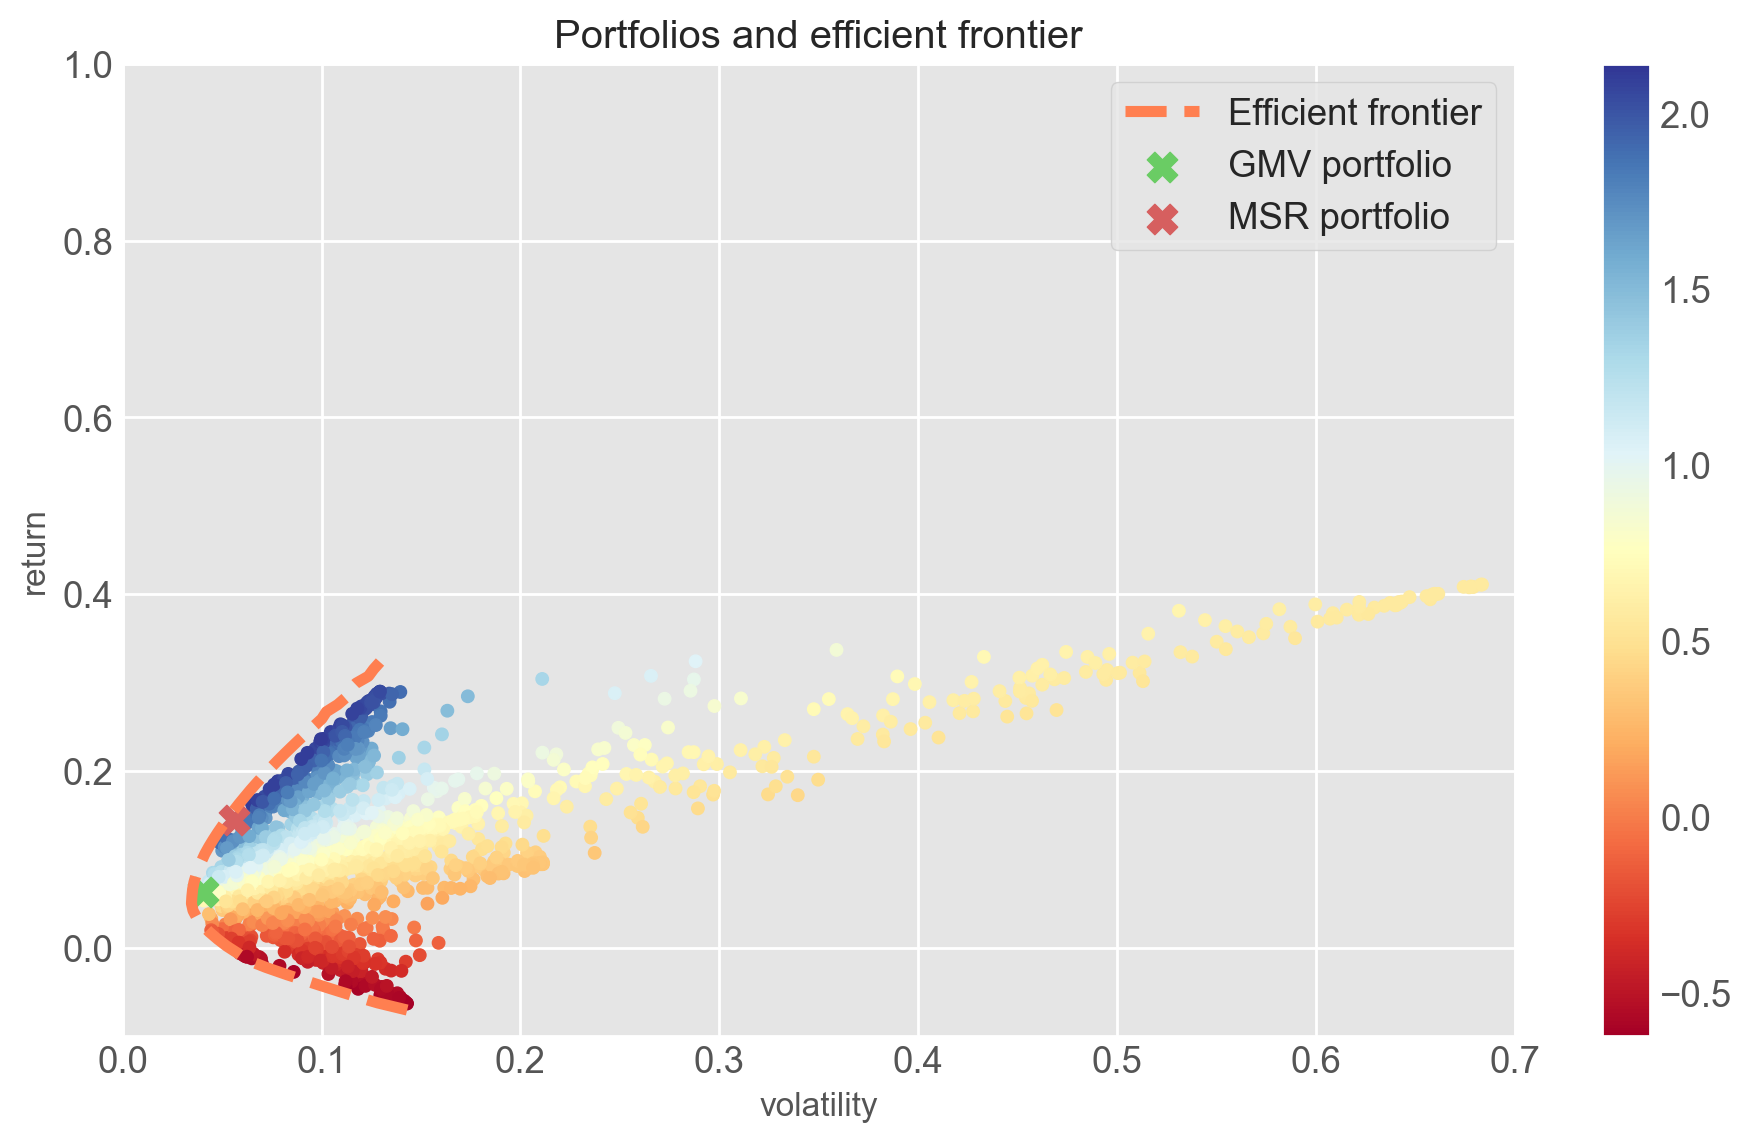

In [148]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], 
                s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# Draw the efficient frontier
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0,0.7])
ax.set_ylim([-0.1,1])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

## Minimum volatility portfolio

In [149]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    # portfolio volatility
    vol = erk.portfolio_volatility(weights, covmat)
    vol = erk.annualize_vol(vol, periods_per_year)

    # portfolio return
    ret = erk.portfolio_return(weights, rets)

    # portfolio sharpe ratio
    shp = erk.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

In [150]:
# Let us see the total (annual) returns of single companies we are investing in
periods_per_year = 252
ann_rets = erk.annualize_rets(returns, periods_per_year)
ann_rets

R_CSPX    0.269138
R_EDMU    0.323243
R_ISP6    0.074637
R_IMEU    0.085565
R_IJPN    0.141694
R_EIMU    0.084610
R_BLKC    0.195881
R_IDTL   -0.070589
R_ITPS    0.079286
R_LQDE    0.074372
R_SHYU    0.086404
R_AGGG   -0.012558
R_IWDP   -0.024433
R_ICOM    0.054654
R_INFR    0.144683
dtype: float64

In [151]:
cov_rets = returns.cov() # annualized
optimal_weights = erk.minimize_volatility(ann_rets, cov_rets)
optimal_weights

array([1.10221381e-02, 3.23177953e-03, 1.25262315e-17, 5.64583037e-02,
       1.06242135e-17, 1.62521990e-02, 4.01029510e-18, 3.07583714e-17,
       2.28290020e-01, 4.88103684e-17, 3.32416788e-01, 3.03487168e-01,
       0.00000000e+00, 4.88416034e-02, 1.08144293e-17])

Portfolio return:       5.59%
Portfolio volatility:   3.47%
Portfolio sharpe ratio: 0.89


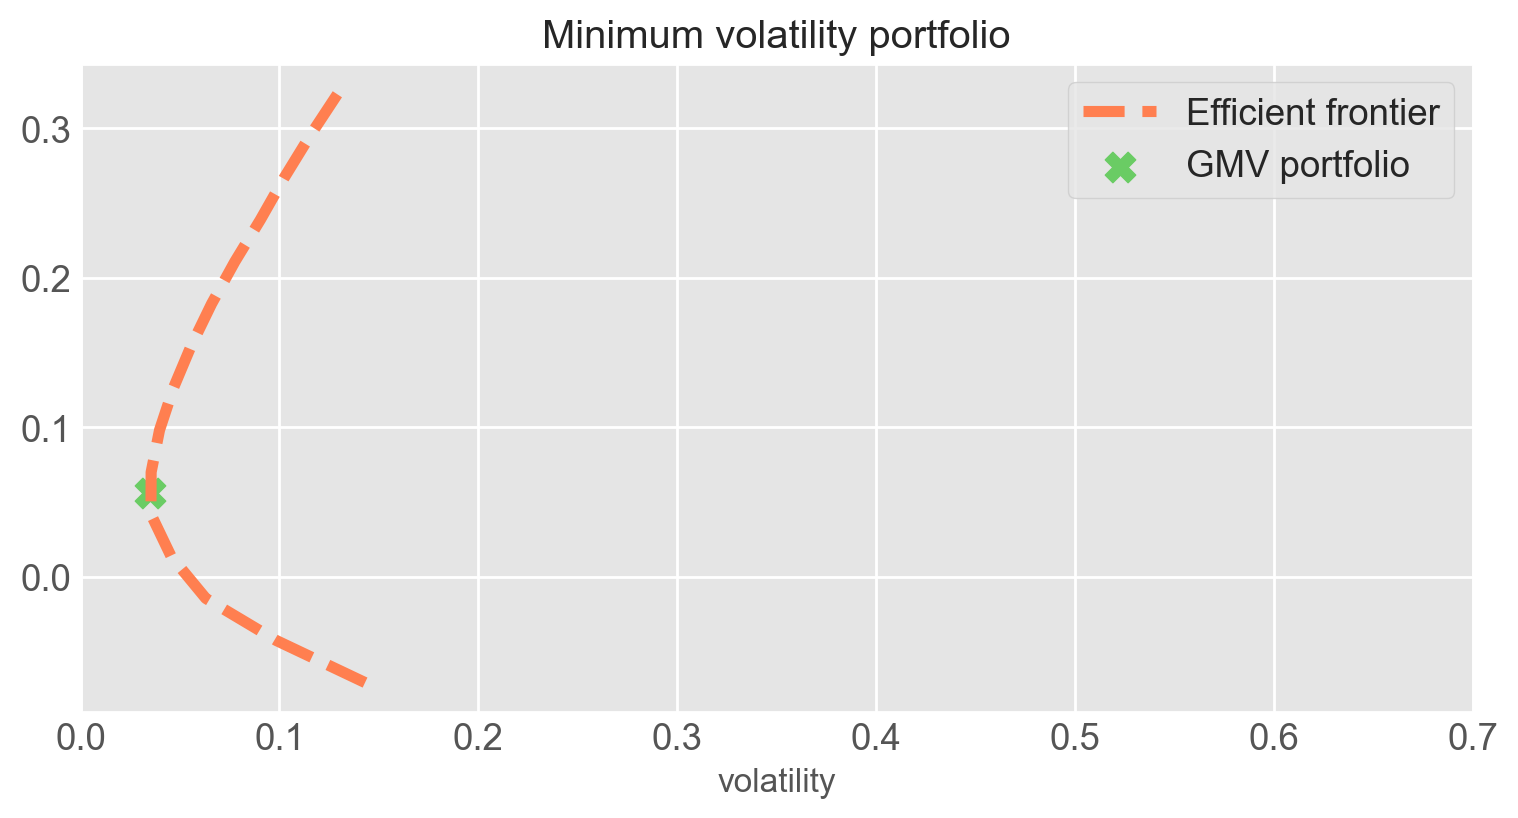

In [152]:
risk_free_rate = 0.025

ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(15, returns, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='g', s=120, label="GMV portfolio")
ax.set_xlim([0,0.7])
ax.legend()
ax.set_title("Minimum volatility portfolio")
plt.show()

Portfolio return:       16.00%
Portfolio volatility:   5.75%
Portfolio sharpe ratio: 2.35


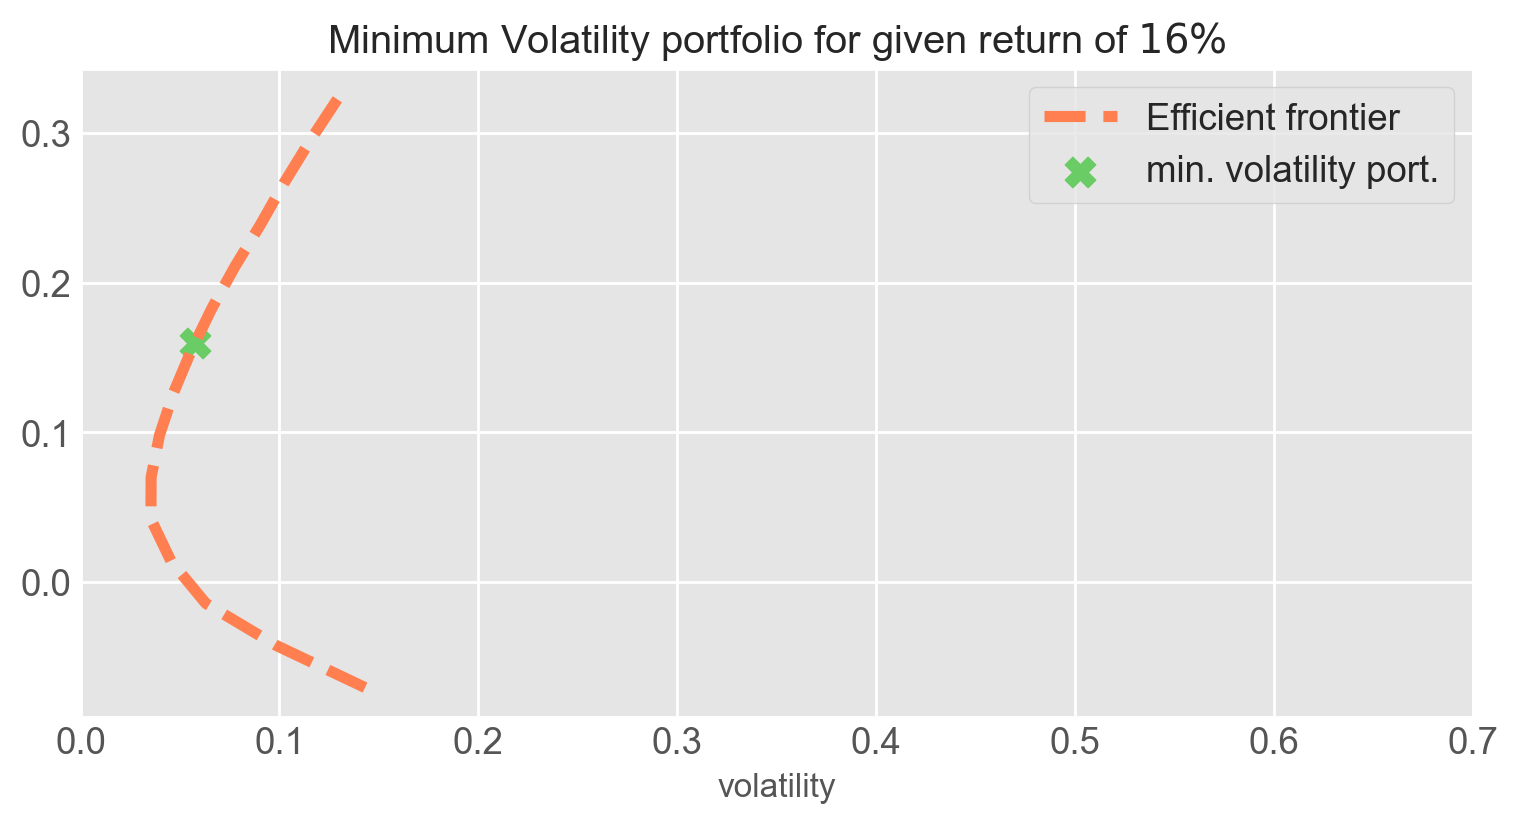

In [153]:
# Finding the optimal portfolios: minimizing the volatility given a fixed return
target_return = 0.16

optimal_weights = erk.minimize_volatility(ann_rets, cov_rets, target_return)

ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(15, returns, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, target_return,  marker="X", color='g', s=120, label="min. volatility port.")
ax.set_xlim([0,0.7])
ax.legend()
ax.set_title("Minimum Volatility portfolio for given return of $16\%$")
plt.show()

## Maximum Sharpe Ratio portfolio

Portfolio return:       19.66%
Portfolio volatility:   7.14%
Portfolio sharpe ratio: 2.40


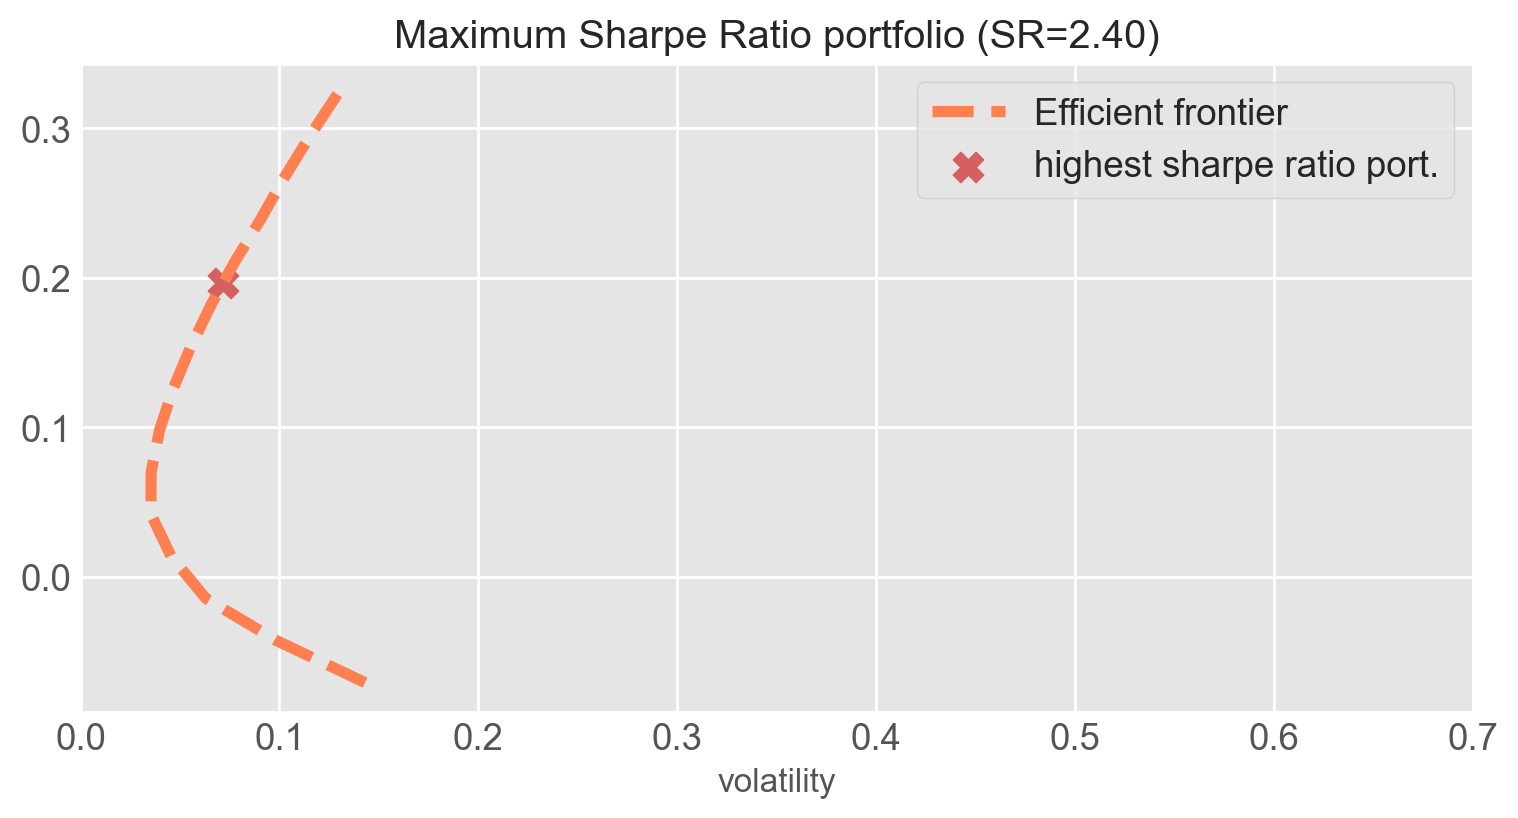

In [154]:
# Finding the optimal portfolios: maximizing the sharpe ratio
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)

ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(15, returns, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highest sharpe ratio port.")
ax.set_xlim([0,0.7])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio (SR={:.2f})".format(shp))
plt.show()


Portfolio return:       26.17%
Portfolio volatility:   10.00%
Portfolio sharpe ratio: 2.37


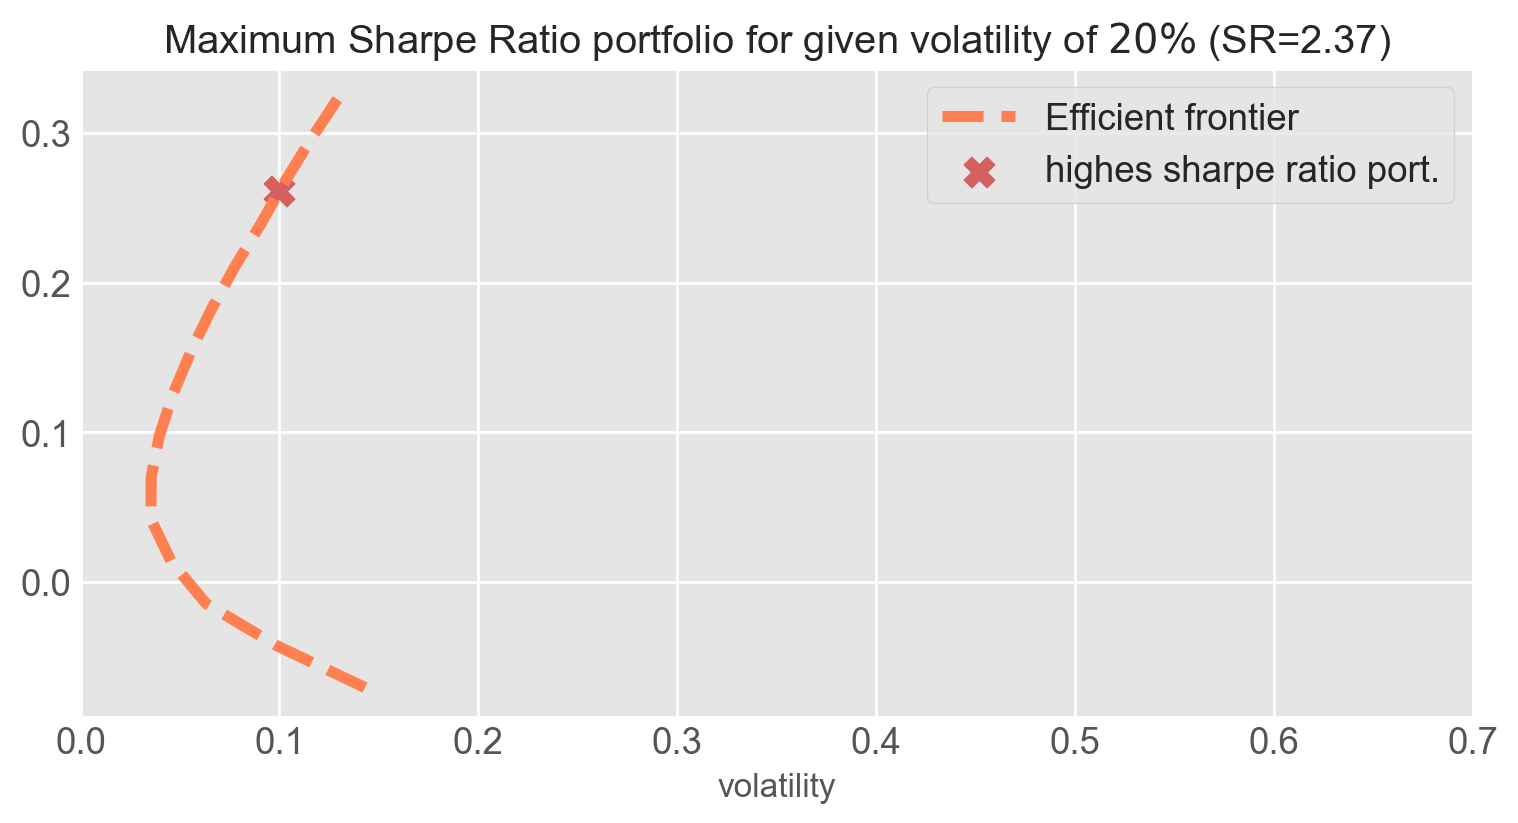

In [155]:
# Finding the optimal portfolios: maximize the sharpe ratio given a fixed volatility
target_volatility = 0.10
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year, target_volatility)

ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(15, returns, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highes sharpe ratio port.")
ax.set_xlim([0,0.7])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio for given volatility of $20\%$ (SR={:.2f})".format(shp))
plt.show()

## Capital Market Line (CML) and The Tangency Portfolio

Portfolio return:       19.66%
Portfolio volatility:   7.14%
Portfolio sharpe ratio: 2.40


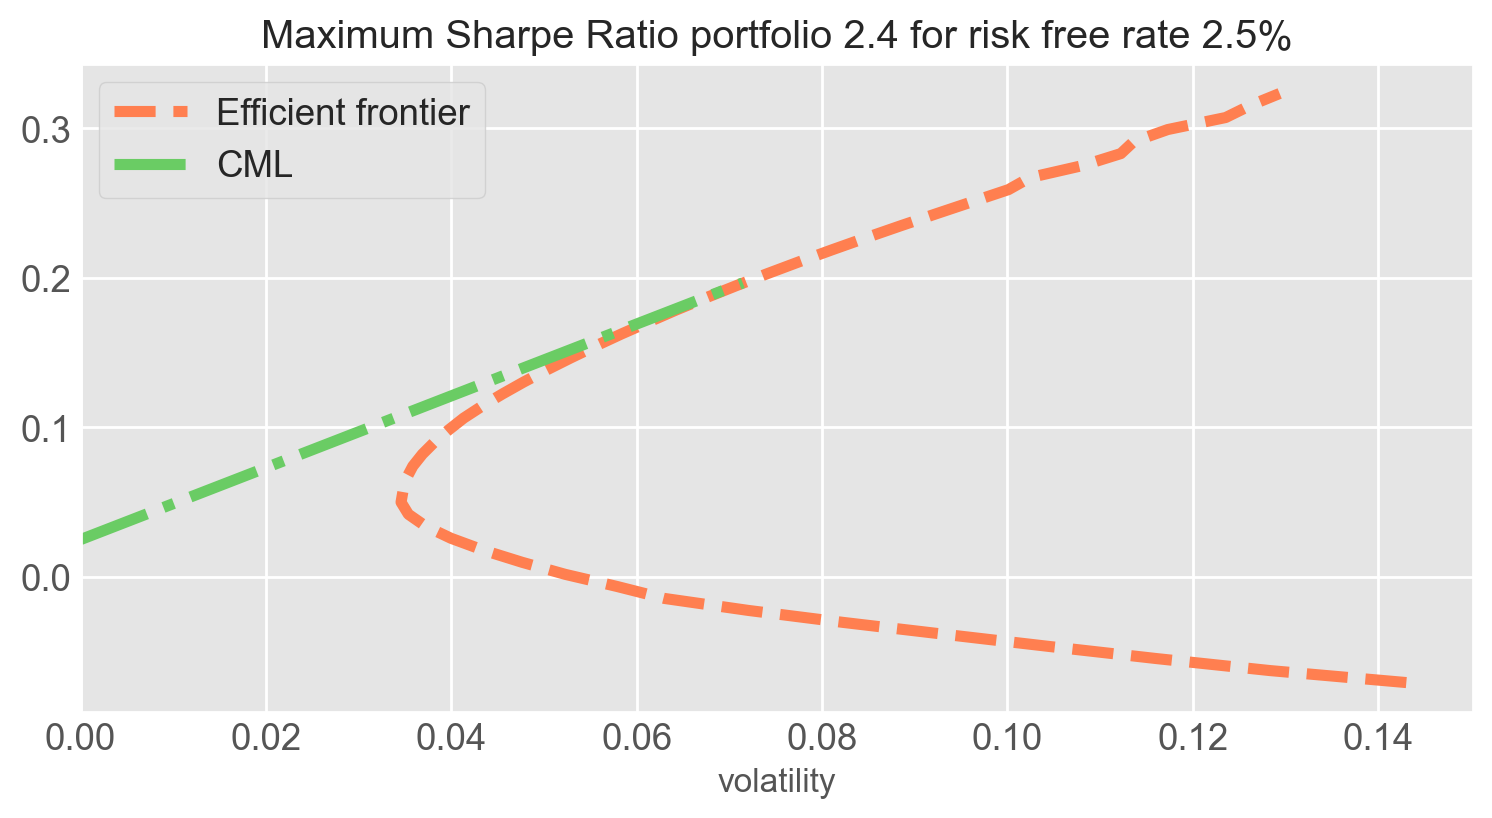

In [156]:
risk_free_rate = 0.025
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)

ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

df, ax = erk.efficient_frontier(50, returns, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, cml=True)
ax.set_title("Maximum Sharpe Ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

## All Portfolios Combined

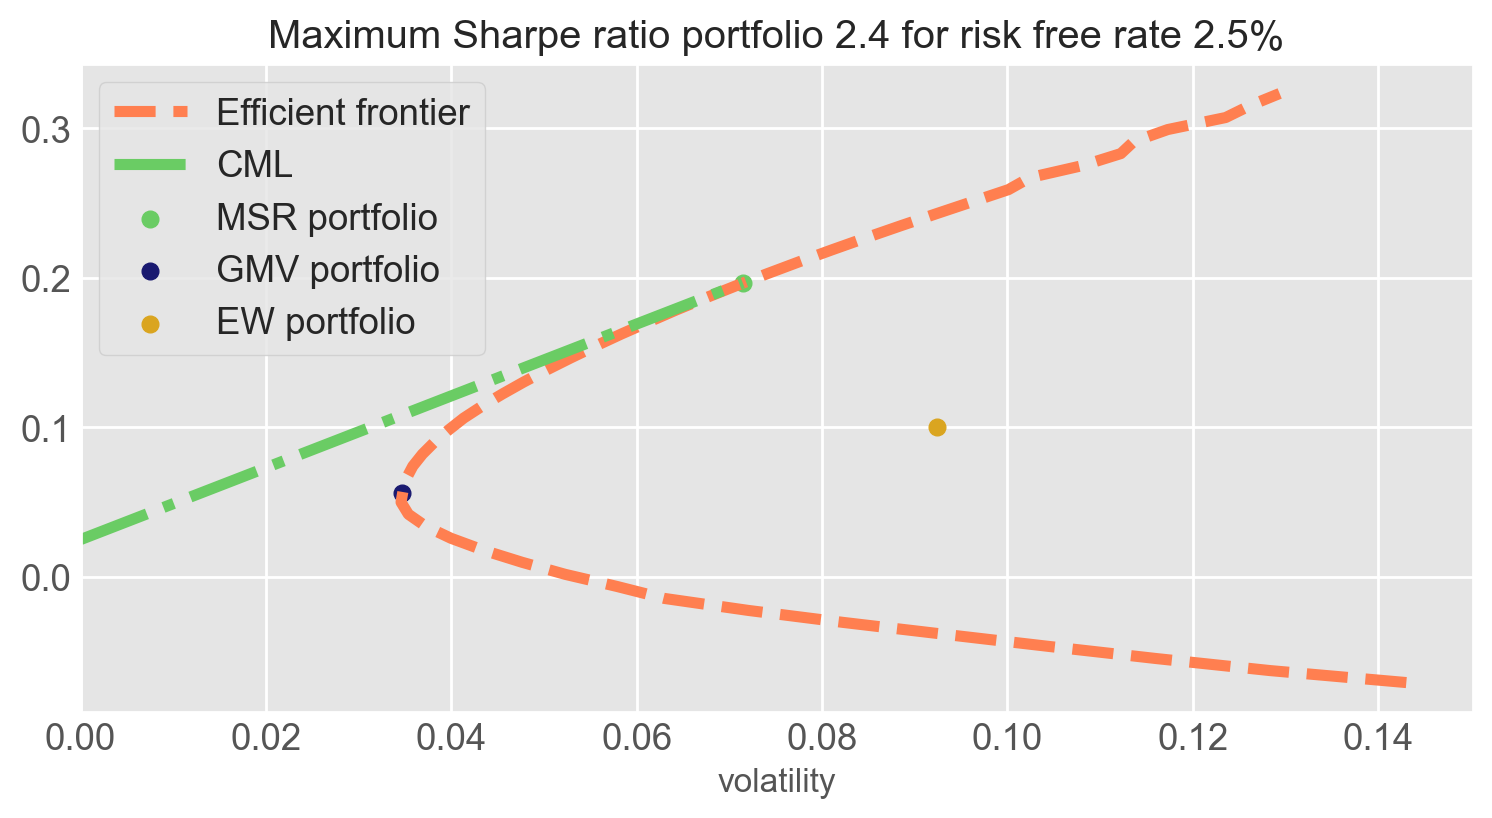

In [157]:
risk_free_rate = 0.025
df, ax = erk.efficient_frontier(50, returns, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, hsr=True, cml=True, mvp=True, ewp=True)
ax.set_title("Maximum Sharpe ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

In [1]:
## Reference: https://www.kaggle.com/code/yousefsaeedian/modern-portfolio-theory-mpt